<a href="https://colab.research.google.com/github/BhattaraiH/BhattaraiH/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Information about the dataset:
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
import pandas as pd

# Read in the file from Google Drive
file_path = '/content/drive/MyDrive/Stroke_ML/healthcare-dataset-stroke-data.csv'
dt = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(dt.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [4]:
# Get number of observations and variables
num_observations, num_variables = dt.shape

# Print the results
print(num_observations, num_variables)


5110 12


Observation: We have 12 variables and 5,110 observations.



##Step 1: Data cleaning

In [5]:
#Checking for missing values
dt.isnull().sum()
#BMI is missing for 201 records.

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [6]:
#Any duplicate rows of information.
dt.duplicated().sum()
#dt.drop_duplicates(inplace=True)
#We have no duplicates rows.

0

In [7]:
#Ensure each column has the correct data type.
dt.dtypes
#All variables have the correct data type.

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [8]:
# Convert binary int64 to categorical
for column in ['hypertension', 'heart_disease', 'stroke', 'ever_married','work_type','Residence_type','smoking_status', 'gender']:
    dt[column] = dt[column].astype('category')

# Display the DataFrame and its dtypes
print(dt.dtypes)

id                      int64
gender               category
age                   float64
hypertension         category
heart_disease        category
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke               category
dtype: object


## Step 2: Initial Data Exploration

In [9]:
#Basic Statistics
dt.describe()

,id,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,43.226614,106.147677,28.893237
std,21161.721625,22.612647,45.283560,7.854067
min,67.000000,0.080000,55.120000,10.300000
25%,17741.250000,25.000000,77.245000,23.500000
50%,36932.000000,45.000000,91.885000,28.100000
75%,54682.000000,61.000000,114.090000,33.100000
max,72940.000000,82.000000,271.740000,97.600000


Observations:

##Step 3: Univariate analysis

Number of columns to plot: 3


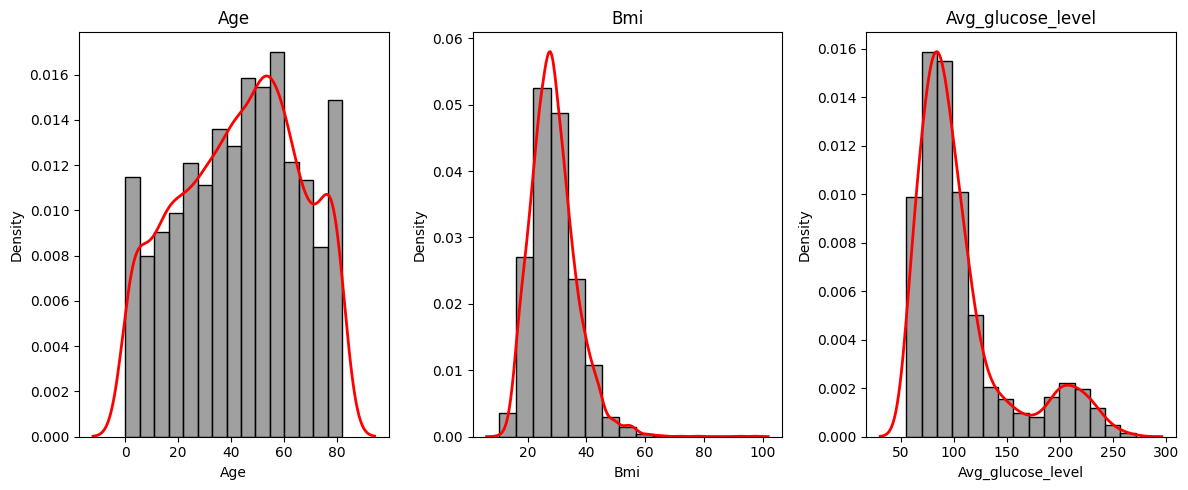

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the columns you want to plot
columns_to_plot = ['age', 'bmi', 'avg_glucose_level']

# Create subplots for the selected columns
num_cols = len(columns_to_plot)
print(f"Number of columns to plot: {num_cols}")

# Calculate the number of rows and columns for subplots
num_rows = (num_cols + 2) // 3  # Since you want 3 columns per row, calculate rows required.

# Create the figure and axes grid
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(12, 5 * num_rows), squeeze=False)

# Iterate through the selected columns and plot histograms with KDE curves
for i, col in enumerate(columns_to_plot):
    row = i // 3  # Calculate row index
    col_index = i % 3  # Calculate column index
    ax = axes[row, col_index]  # Get the current subplot axes

    # Plot histogram with distinct bars and KDE curve
    sns.histplot(dt[col], ax=ax, kde=False, stat="density",color='grey', edgecolor='black',bins=15)  # Set bins for distinct bars
    # Customize the plot
    # Plot KDE separately and set color
    sns.kdeplot(dt[col], ax=ax, color='red', linewidth=2)
    # Set the title and label, applying proper capitalization
    title = col.capitalize()  # Capitalize the first letter of the column name
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(title, fontsize=10)  # Same format for x-axis label
    ax.set_ylabel("Density", fontsize=10)

# Adjust layout for tight fitting
plt.tight_layout()
plt.show()


Observation: Age: somewhat normally distributed. The ages of the patients in this data are close to a normal distribution, with mean of 43.23 from the describe() function. Based on the mean and the above histogram, most patients are around their 40s.

Glucose level: The average glucose level of the patients in this dataset is right skewed, with mean of 106.15, calculated using the describe() function.

BMI: Right skewed: The data for patient Body Mass Index is right skewed, with a mean of 28.89, mostly fall between 20 to 35. I have noticed that we have 4% records with missinng BMI. Since BMI is one of the significant predictors of stroke, lets not drop the data. Instead, impute the BMI value using mean method.
We are using the mean method since the BMI is fairly normally distributed, imputing using mean is simple and effective approach.

In [11]:
#We have noticed that we have 4% records with missinng BMI. Since BMI is one of the significant predictors of stroke, lets not drop the data. Instead, impute the BMI value using mean method.
#We are using the mean method since the BMI is fairly normally distributed, imputing using mean is simple and effective approach.
# Impute missing BMI values using the mean
mean_bmi = dt['bmi'].mean()
# Impute missing BMI values by assigning the calculated mean directly
dt['bmi'] = dt['bmi'].fillna(mean_bmi)

#Checking for missing values
dt.isnull().sum()
#We have no missing values now-Great!

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


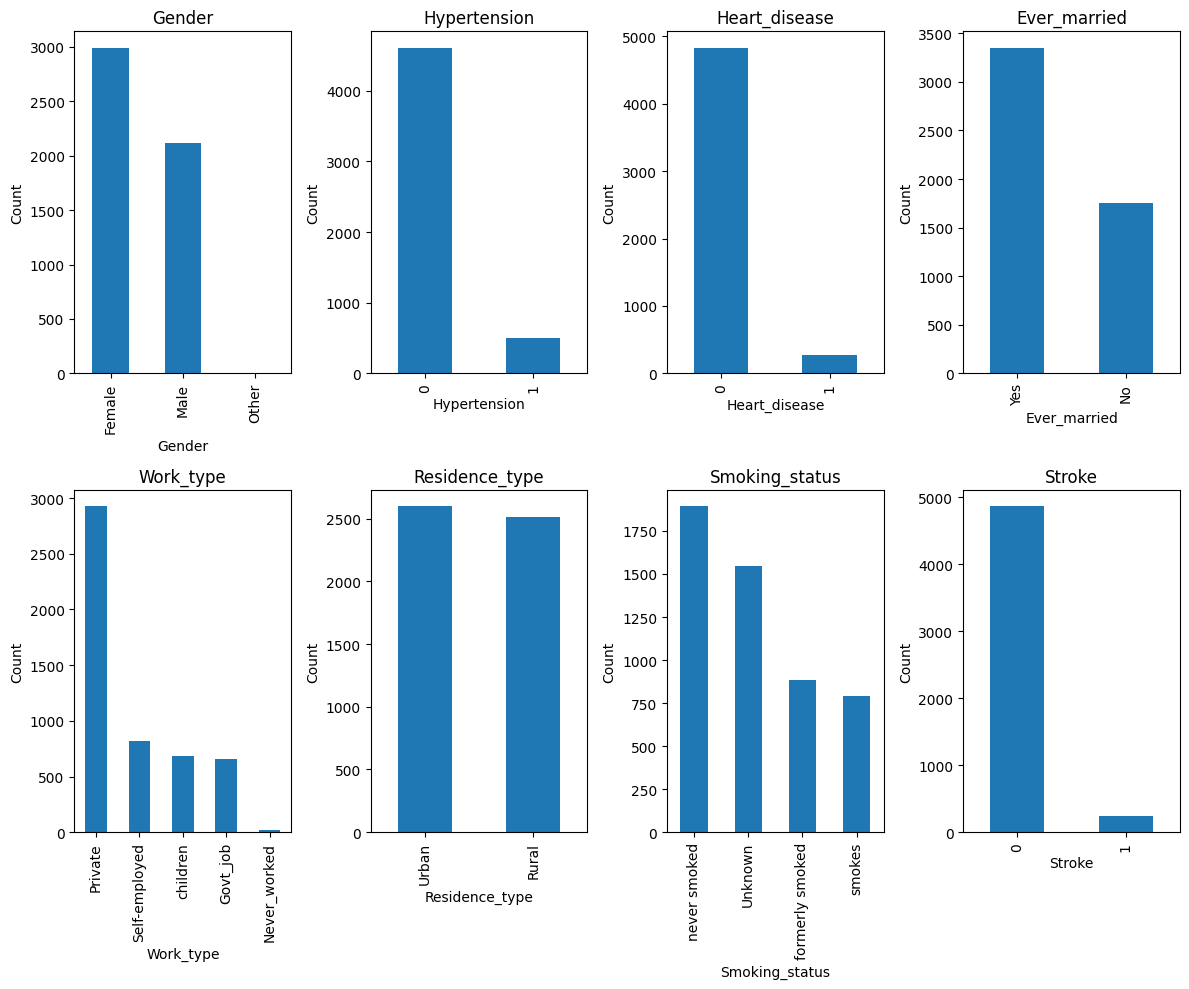

In [12]:
#Categorical Analysis: Use bar plots to visualize counts of categorical variables.
categorical_columns = dt.select_dtypes(include=['object', 'category']).columns # Select columns with object type
num_cat_cols = len(categorical_columns)
num_rows = (num_cat_cols + 1) // 4  # Calculate number of rows for subplots

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(12, 5 * num_rows))  # Create subplots

# Iterate through categorical columns and plot on subplots
for i, col in enumerate(categorical_columns):
    row = i // 4  # Calculate row index
    col_index = i % 4  # Calculate column index
    ax = axes[row, col_index]  # Get the current subplot axes

    dt[col].value_counts().plot(kind='bar', ax=ax) # Plot on the current subplot
    # Set the title and label, applying proper capitalization
    title = col.capitalize()  # Capitalize the first letter of the column name
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(title, fontsize=10)  # Same format for x-axis label
    ax.set_ylabel("Count", fontsize=10)



plt.tight_layout()
plt.show()

In [13]:
# Get categorical variables
categorical_cols = dt.select_dtypes(include=['object', 'category']).columns

# Create frequency tables for each categorical variable
frequency_tables = {}
for col in categorical_cols:
    counts = dt[col].value_counts()
    percentages = dt[col].value_counts(normalize=True) * 100
    frequency_tables[col] = pd.DataFrame({'Counts': counts, 'Percentage': percentages})

# Display frequency tables
for col, freq_table in frequency_tables.items():
    print(f"Frequency table for {col}:\n{freq_table}\n")

Frequency table for gender:
        Counts  Percentage
gender                    
Female    2994   58.590998
Male      2115   41.389432
Other        1    0.019569

Frequency table for hypertension:
              Counts  Percentage
hypertension                    
0               4612   90.254403
1                498    9.745597

Frequency table for heart_disease:
               Counts  Percentage
heart_disease                    
0                4834   94.598826
1                 276    5.401174

Frequency table for ever_married:
              Counts  Percentage
ever_married                    
Yes             3353   65.616438
No              1757   34.383562

Frequency table for work_type:
               Counts  Percentage
work_type                        
Private          2925   57.240705
Self-employed     819   16.027397
children          687   13.444227
Govt_job          657   12.857143
Never_worked       22    0.430528

Frequency table for Residence_type:
                Counts  

In [14]:
#I noticed that there is just one 'other' gender category. This could just be due to an error, so lets re-code this as 'Female' since female has the highest numbers.
# Print the original value counts
print("Original Value Counts:")
print(dt['gender'].value_counts())

# Recode 'Other' (or any non-'Male') category to 'Female', keep 'Male' as is
# Use .loc with boolean indexing for correct replacement
dt.loc[dt['gender'] != 'Male', 'gender'] = 'Female'

# Check the resulting value counts
print("\nAfter Recode:")
print(dt['gender'].value_counts())

Original Value Counts:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

After Recode:
gender
Female    2995
Male      2115
Other        0
Name: count, dtype: int64


There are more Female patients than Male. The one entry that was stated as ‘Other’ was added to the ‘Female’ section since majority are female patients.

Number of patients without hypertention and heart disease are significantly greater than the number of patients with hypertention or heart disease.

Nearly half of the patients are unmarried than those who married.


There are nearly even number of patients that are working government jobs, are self-employed, and are children. The majority of patients work for private companies, and a small number have never worked.

Residential type is evenly distributed across urban and rural.

Significant number of patients never smoked followed by unknown status. Smoking is could be one of the biggest predictors of stroke. Therefore, I would like to impute this variable and have one of the status (smoke, never smoke, or former smoker) instead of unknown.

The number of patients who never had strokes is signficantly greater than the number of patients who have. Only 5% patients have the outcome of interest.. We will need to address this issue before initializing ML models.


##Let's address the issue wiith the smoking status variable. We will use some features from the dataset to predict the smoking status for the rows that are labelled unknown. For this purpose, I will use the random forest classifier model.

In [15]:
#Let's see the distribution of the variable one more time.
# Check the count of each smoking status including 'unknown'
print(dt['smoking_status'].value_counts())


smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


Train a model to predict smoking status.
We are going to predict whether a person that has unknown smoking status is a smoker, former smoker, or never smoked based on other variables, you can use a machine learning model to predict the category for rows where smoking status is 'unknown'. Here's how we will address this:

1. Create a new DataFrame where smoking status is not 'unknown' for training the model.
2. Select relevant features (e.g., age, gender, hypertension, heart disease, and residence type) to train the model.
3. Train a classifier to predict smoking status.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Filter out rows where smoking status is not 'unknown' for training
train_data = dt[dt['smoking_status'] != 'unknown']

# Convert categorical variables to numerical using one-hot encoding
# Convert 'Residence_type' to numerical before one-hot encoding
train_data['Residence_type'] = train_data['Residence_type'].map({'Urban': 1, 'Rural': 0})
train_data['gender'] = train_data['gender'].map({'Male': 1, 'Female': 0})


# Select features for training
X = train_data[['age', 'gender', 'hypertension', 'heart_disease', 'Residence_type']]  # Choose relevant features
y = train_data['smoking_status']  # Target variable (smoking status)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = rf_model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# Evaluate performance using classification report (precision, recall, F1 score)
print(classification_report(y_test, y_pred))

Model Accuracy: 0.4217
                 precision    recall  f1-score   support

        Unknown       0.56      0.54      0.55       311
formerly smoked       0.20      0.12      0.15       173
   never smoked       0.42      0.57      0.49       385
         smokes       0.24      0.15      0.18       153

       accuracy                           0.42      1022
      macro avg       0.35      0.35      0.34      1022
   weighted avg       0.40      0.42      0.40      1022



Based on the classification report, it's clear that the model is struggling significantly, particularly with predicting the "Formerly Smoked" and "Smokes" categories, as evidenced by the low precision, recall, and F1-scores for these categories. The model's overall accuracy of 42% confirms that it's not performing well, and the macro average and weighted average of 0.34 and 0.40, respectively, indicate that the model is not doing a good job across the board.

We could hyperparameter tune the model and try other different models to predict the smoking status.
For this project, I am going to randomly assign the smoking status for those 'unknown' records based on the distribution of the variable. This will preserve the proportions of the categories.

In [17]:
# Get the probability distribution of the categories
smoking_dist = dt['smoking_status'].value_counts(normalize=True)
categories = smoking_dist.index.tolist()

# Set the random seed for reproducibility
np.random.seed(42)  # You can choose any number for the seed (42 is just an example)


# Before imputation, make a copy of the original DataFrame to avoid modifying `dt`
imputed_dt = dt.copy()

# Reset the 'Unknown' category (if it's been modified previously) in the new DataFrame
imputed_dt['smoking_status'] = imputed_dt['smoking_status'].replace('Unknown', 'Unknown')  # Ensure 'Unknown' values are in place

# Impute 'Unknown' based on the distribution in the new DataFrame
unknown_indices = imputed_dt[imputed_dt['smoking_status'] == 'Unknown'].index
imputed_dt.loc[unknown_indices, 'smoking_status'] = np.random.choice(categories, size=len(unknown_indices), p=smoking_dist)

# Print the value counts of the imputed DataFrame
print(imputed_dt['smoking_status'].value_counts())


smoking_status
never smoked       2473
formerly smoked    1138
smokes             1040
Unknown             459
Name: count, dtype: int64


In [18]:
print(imputed_dt.head())

      id  gender   age hypertension heart_disease ever_married      work_type  \
0   9046    Male  67.0            0             1          Yes        Private   
1  51676  Female  61.0            0             0          Yes  Self-employed   
2  31112    Male  80.0            0             1          Yes        Private   
3  60182  Female  49.0            0             0          Yes        Private   
4   1665  Female  79.0            1             0          Yes  Self-employed   

  Residence_type  avg_glucose_level        bmi   smoking_status stroke  
0          Urban             228.69  36.600000  formerly smoked      1  
1          Rural             202.21  28.893237     never smoked      1  
2          Rural             105.92  32.500000     never smoked      1  
3          Urban             171.23  34.400000           smokes      1  
4          Rural             174.12  24.000000     never smoked      1  


In [19]:
print(dt.head())

      id  gender   age hypertension heart_disease ever_married      work_type  \
0   9046    Male  67.0            0             1          Yes        Private   
1  51676  Female  61.0            0             0          Yes  Self-employed   
2  31112    Male  80.0            0             1          Yes        Private   
3  60182  Female  49.0            0             0          Yes        Private   
4   1665  Female  79.0            1             0          Yes  Self-employed   

  Residence_type  avg_glucose_level        bmi   smoking_status stroke  
0          Urban             228.69  36.600000  formerly smoked      1  
1          Rural             202.21  28.893237     never smoked      1  
2          Rural             105.92  32.500000     never smoked      1  
3          Urban             171.23  34.400000           smokes      1  
4          Rural             174.12  24.000000     never smoked      1  


Observation:
Total number of rows remains the same: The total number of rows in the dataset didn't change. The 'Unknown' rows are just being replaced with a valid value, and the total count of categories adjusts accordingly.

Category counts are adjusting proportionally: After imputation, the categories "never smoked," "formerly smoked," and "smokes" all increase in count. This is because the imputed values are being drawn from these categories. The only category that decreases is "Unknown," as those rows are now filled with real values.

##Step 4: Bivariate analysis

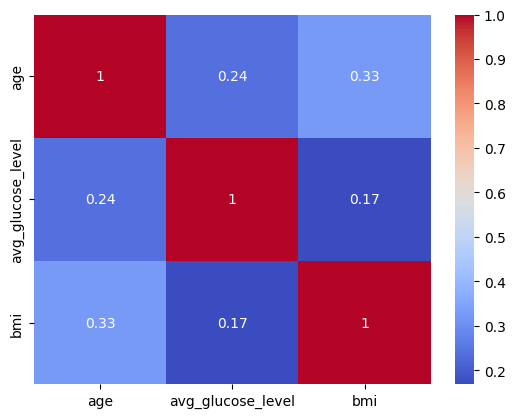

In [20]:
# Correlation matrix
# Correlation matrix for numerical features only
# Select only numerical columns for correlation analysis
numerical_dt = dt.select_dtypes(include=['number'])
numerical_dt=numerical_dt.drop(columns=['id'], errors='ignore') # Drop 'id' column if it exists

corr = numerical_dt.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()
#None of the numerical variables are strongly correlated.

In [21]:
print(dt.dtypes)

id                      int64
gender               category
age                   float64
hypertension         category
heart_disease        category
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke               category
dtype: object


In [22]:
print(imputed_dt.head())

      id  gender   age hypertension heart_disease ever_married      work_type  \
0   9046    Male  67.0            0             1          Yes        Private   
1  51676  Female  61.0            0             0          Yes  Self-employed   
2  31112    Male  80.0            0             1          Yes        Private   
3  60182  Female  49.0            0             0          Yes        Private   
4   1665  Female  79.0            1             0          Yes  Self-employed   

  Residence_type  avg_glucose_level        bmi   smoking_status stroke  
0          Urban             228.69  36.600000  formerly smoked      1  
1          Rural             202.21  28.893237     never smoked      1  
2          Rural             105.92  32.500000     never smoked      1  
3          Urban             171.23  34.400000           smokes      1  
4          Rural             174.12  24.000000     never smoked      1  


In [23]:
# Ensure 'work_type' and 'smoking_status' are categorical (object type)
print(imputed_dt.dtypes)

id                      int64
gender               category
age                   float64
hypertension         category
heart_disease        category
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke               category
dtype: object


In [24]:
# Convert 'Residence_type' to numerical before one-hot encoding
imputed_dt['Residence_type'] = imputed_dt['Residence_type'].map({'Urban': 1, 'Rural': 0})
imputed_dt['ever_married'] = imputed_dt['ever_married'].map({'Yes': 1, 'No': 0})
imputed_dt['gender'] = imputed_dt['gender'].map({'Male': 1, 'Female': 0})
print(imputed_dt.head())

      id  gender   age hypertension heart_disease ever_married      work_type  \
0   9046     1.0  67.0            0             1            1        Private   
1  51676     0.0  61.0            0             0            1  Self-employed   
2  31112     1.0  80.0            0             1            1        Private   
3  60182     0.0  49.0            0             0            1        Private   
4   1665     0.0  79.0            1             0            1  Self-employed   

  Residence_type  avg_glucose_level        bmi   smoking_status stroke  
0              1             228.69  36.600000  formerly smoked      1  
1              0             202.21  28.893237     never smoked      1  
2              0             105.92  32.500000     never smoked      1  
3              1             171.23  34.400000           smokes      1  
4              0             174.12  24.000000     never smoked      1  


In [25]:
!pip install scikit-learn
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical variables
categorical_features = ['work_type', 'smoking_status']
continuous_features = ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level','bmi','stroke']

encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop first to avoid multicollinearity
encoded_categorical = encoder.fit_transform(imputed_dt[categorical_features])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

# Reset indices
X_continuous_reset = imputed_dt[continuous_features].reset_index(drop=True)
encoded_categorical_df_reset = encoded_categorical_df.reset_index(drop=True)
encoded_categorical_df_reset1=encoded_categorical_df_reset.astype(int)
encoded_categorical_df_reset1

# Concatenate again
df = pd.concat([X_continuous_reset, encoded_categorical_df_reset1], axis=1)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1.0,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0,1,0,0
1,51676,0.0,61.0,0,0,1,0,202.21,28.893237,1,0,0,1,0,0,1,0
2,31112,1.0,80.0,0,1,1,0,105.92,32.500000,1,0,1,0,0,0,1,0
3,60182,0.0,49.0,0,0,1,1,171.23,34.400000,1,0,1,0,0,0,0,1
4,1665,0.0,79.0,1,0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0


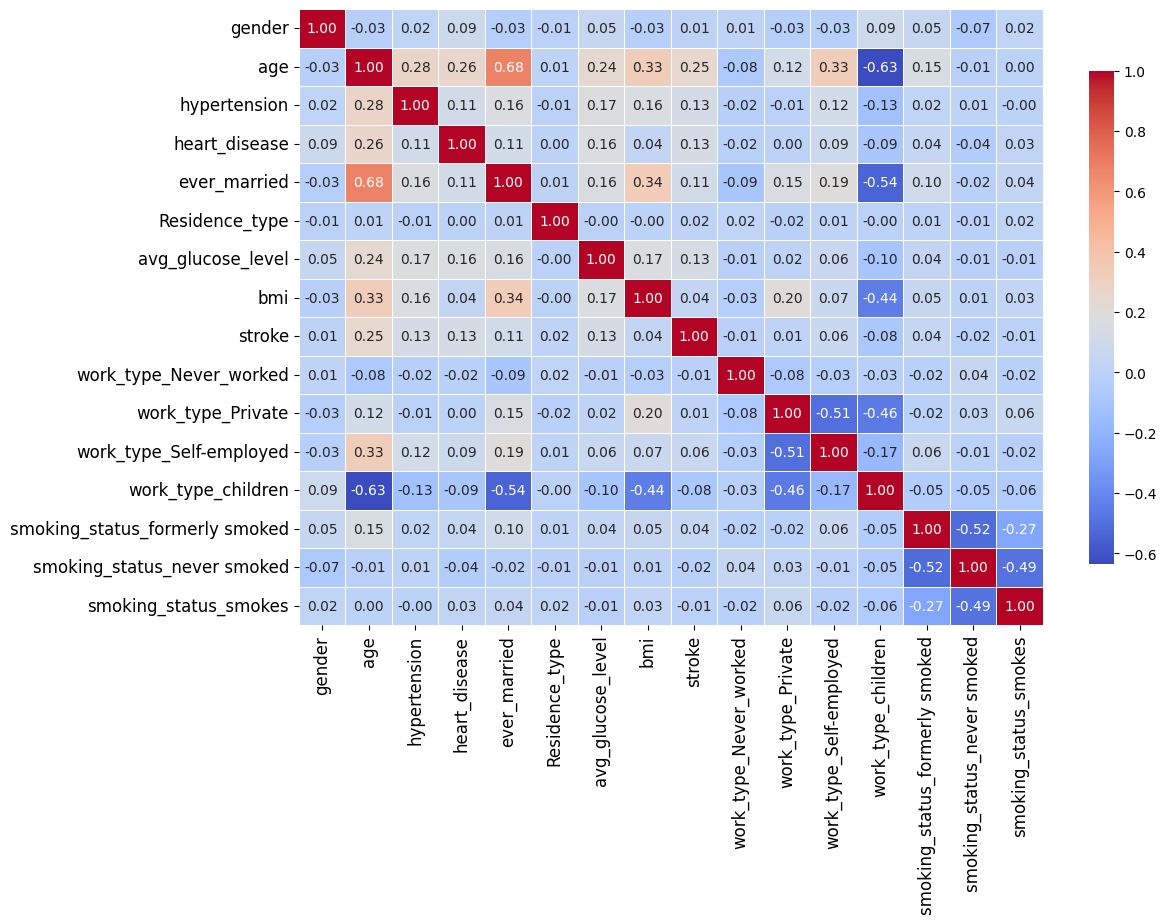

In [26]:
# Drop 'id' column only for correlation calculation
corr = df.drop(columns=['id']).corr()
# Create the heatmap
plt.figure(figsize=(12, 8))  # Increase the figure size
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 10},
            cbar_kws={'shrink': 0.8}, linewidths=0.5, linecolor='white')

# Adjust font size for axes labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

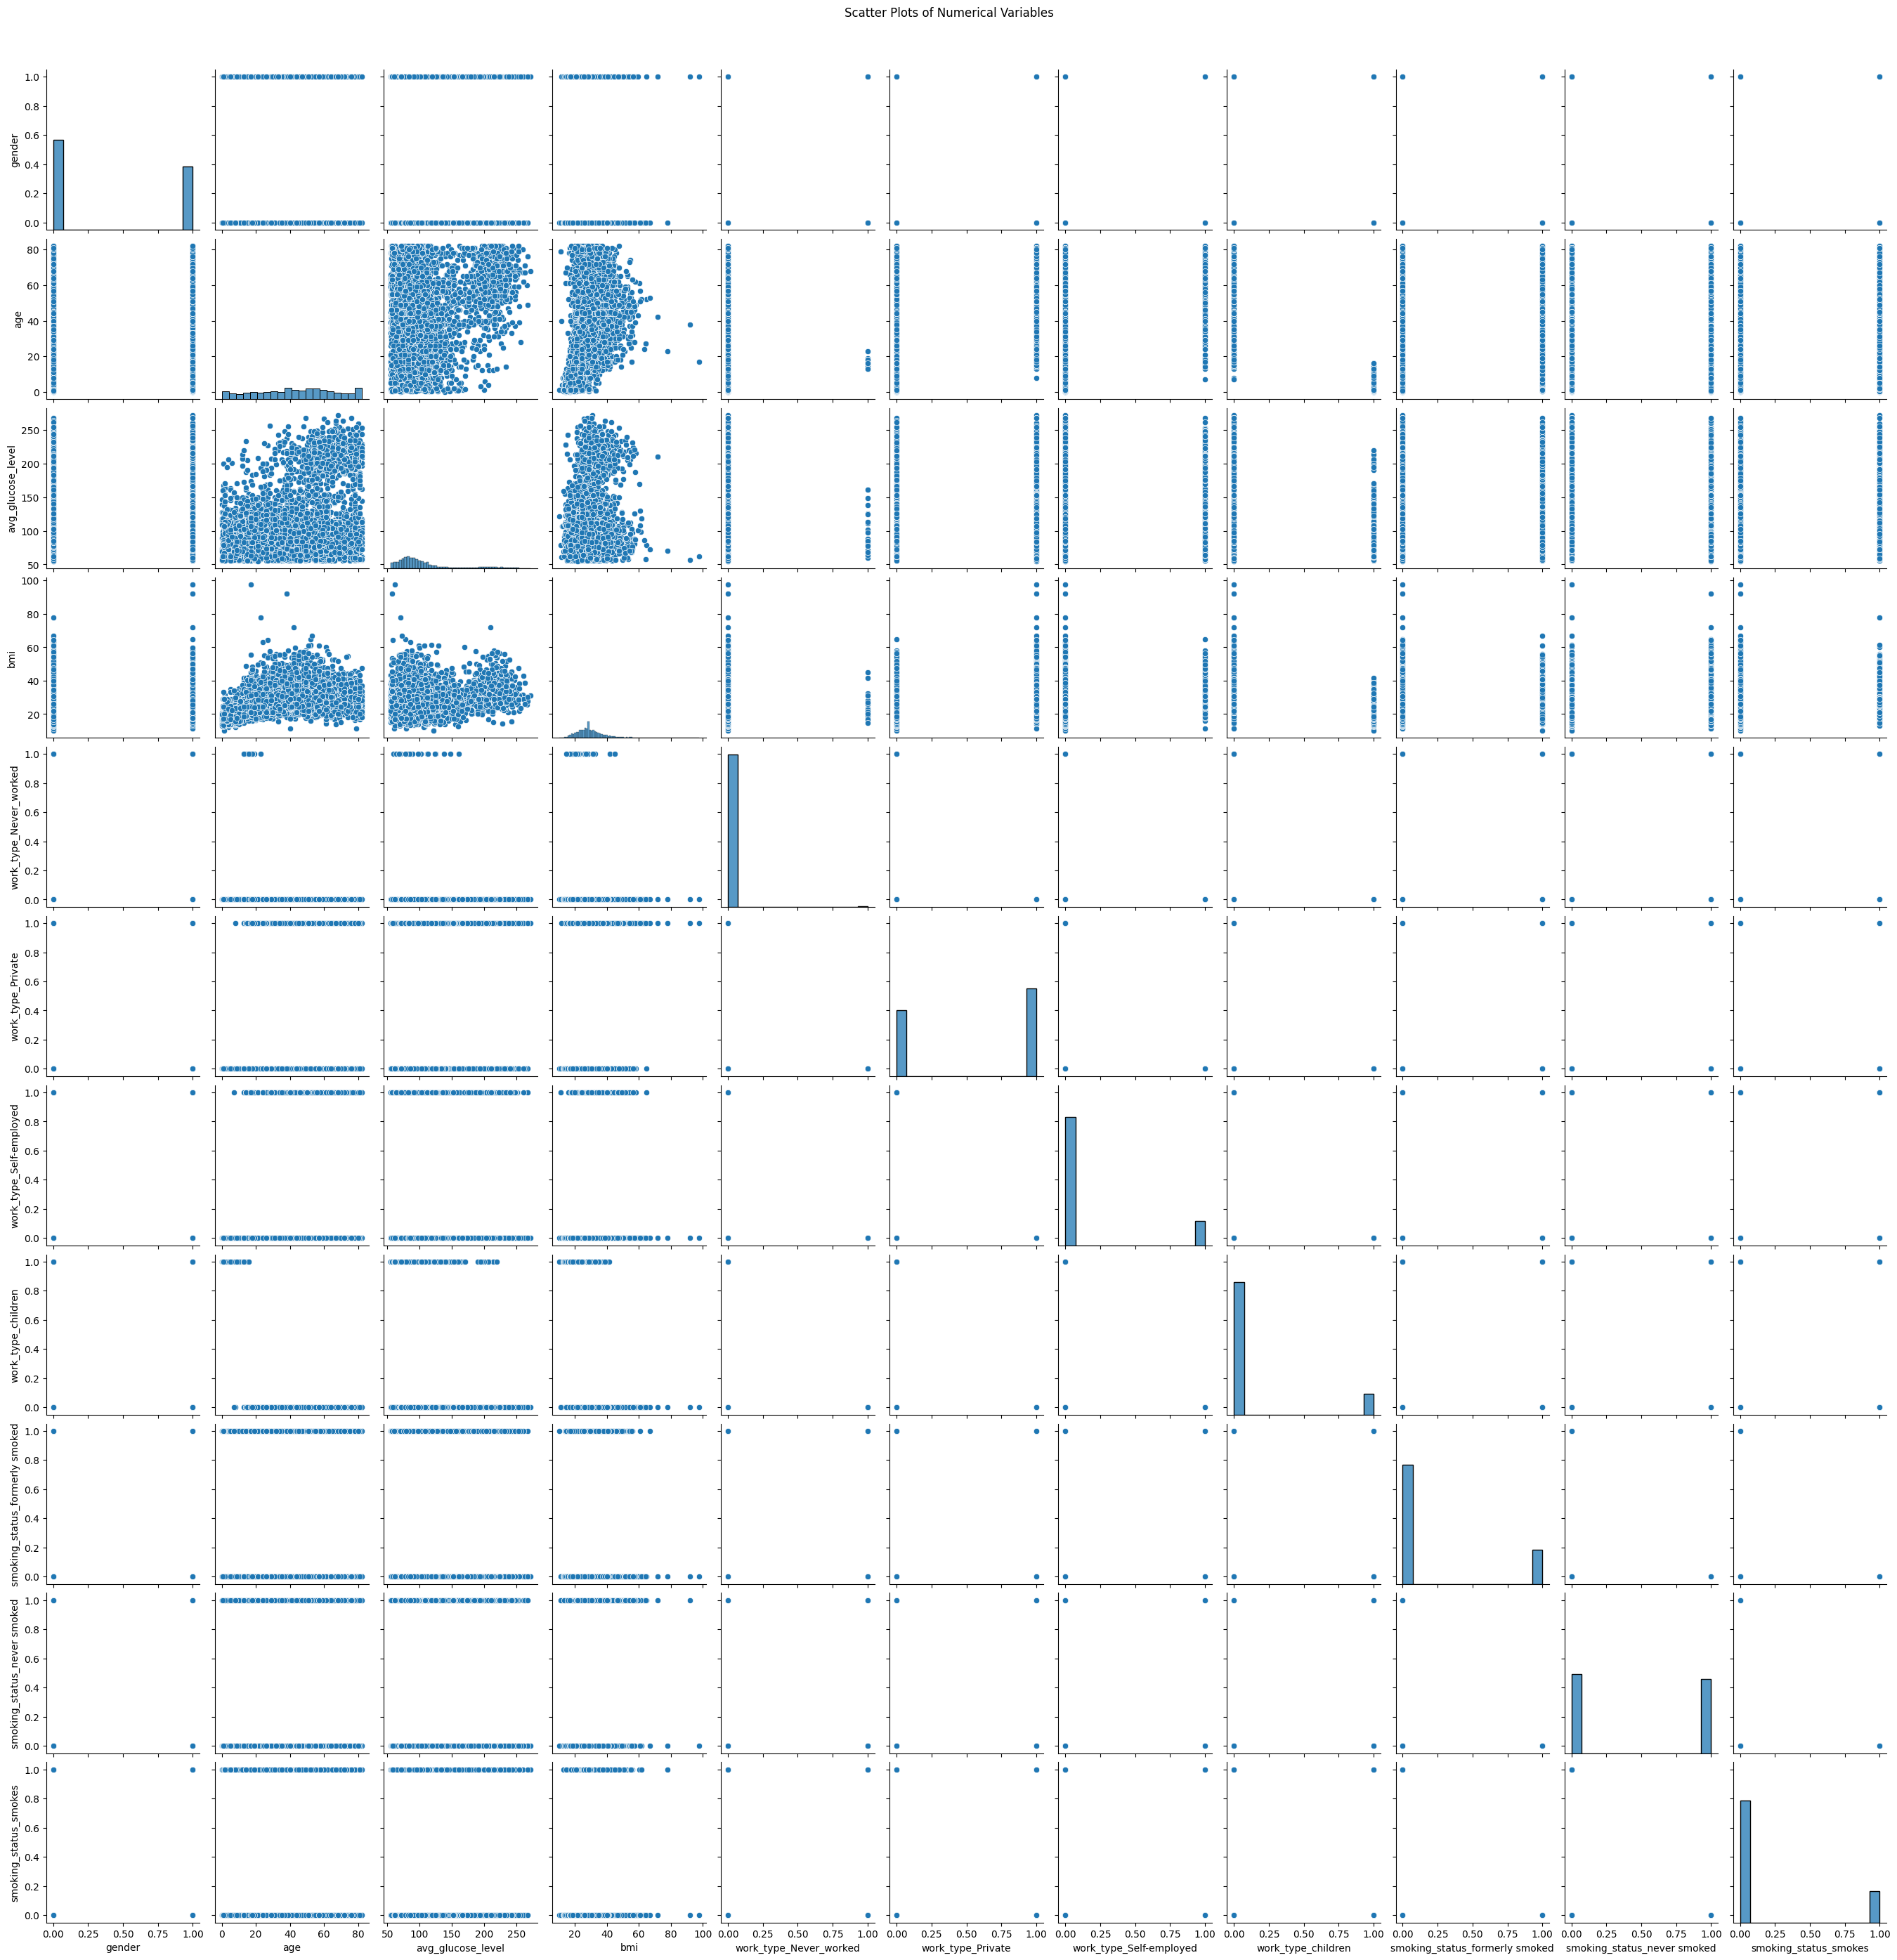

In [ ]:
# Scatter plot
# Select numerical variables
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create pairwise scatter plots
sns.pairplot(df[numerical_cols].drop(columns=['id']))
plt.suptitle('Scatter Plots of Numerical Variables', y=1.02)  # Adjust title position
plt.show()


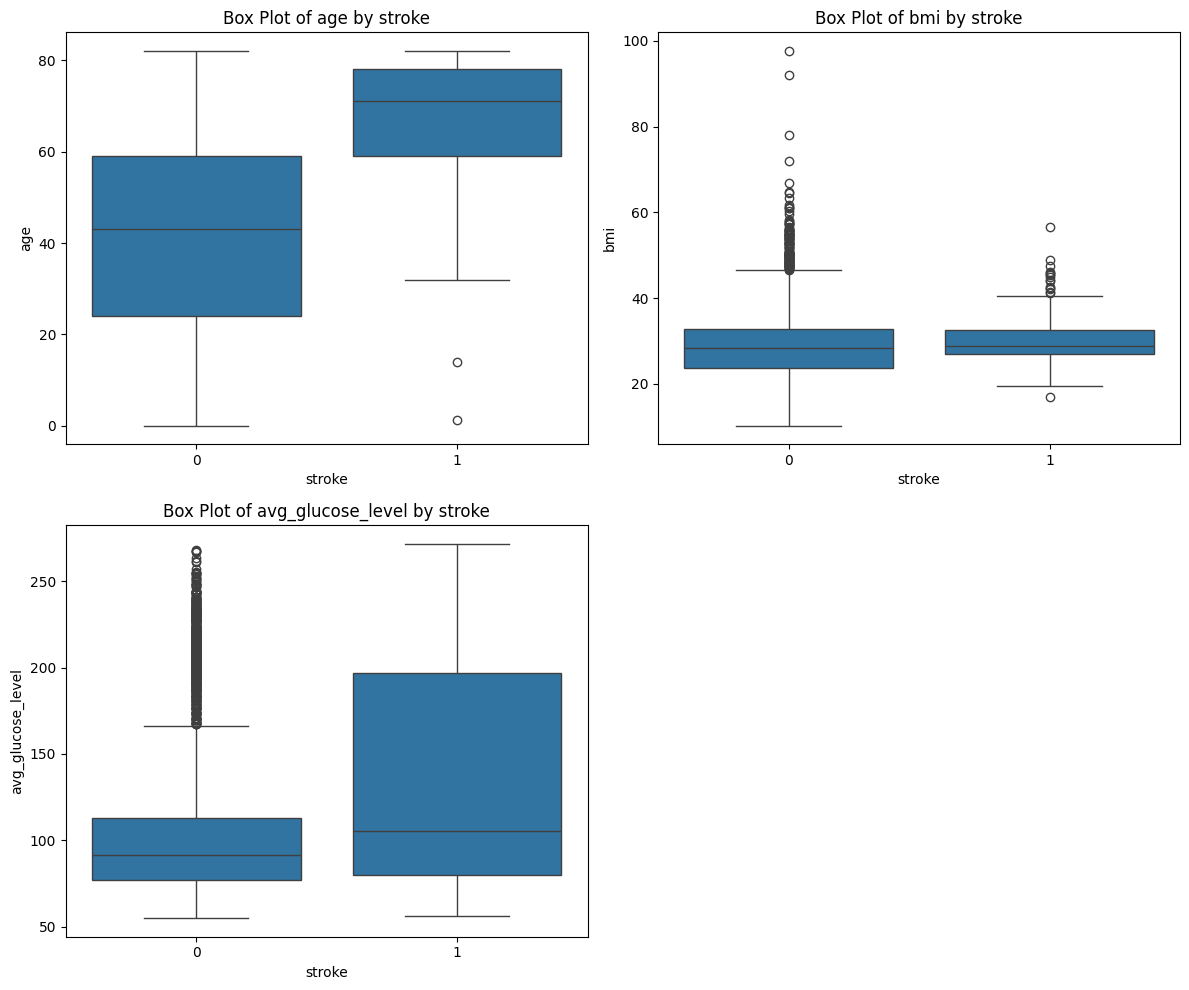

In [ ]:
# Select numerical variables
#numerical_columns = df.select_dtypes(include=['number']).columns
#numerical_cols = numerical_columns[numerical_columns != 'id']  # Exclude 'id' form the list.

# Select only the relevant numerical columns (age, bmi, glucose)
numerical_cols = ['age', 'bmi', 'avg_glucose_level']

# Specify the outcome variable
outcome_variable = 'stroke'

# Calculate the number of rows needed for subplots
num_rows = (len(numerical_cols) + 1) // 2

# Create a figure and axes for the subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through numerical columns and plot on subplots
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=outcome_variable, y=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col} by {outcome_variable}')
    axes[i].set_xlabel(outcome_variable)
    axes[i].set_ylabel(col)

# Hide any unused subplots
for i in range(len(numerical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [27]:
import scipy.stats as stats  # Import the stats module from scipy
# T-test example between two groups based on stroke outcome
group1 = dt[dt['stroke'] == 1]['bmi'].dropna()  # Drop NaN values from group1
group2 = dt[dt['stroke'] == 0]['bmi'].dropna()  # Drop NaN values from group2
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 2.785637387412078, P-value: 0.005361957129403666


Since the p-value (0.00298) is less than the typical significance level of 0.05, we would reject the null hypothesis. This suggests that there is a statistically significant difference in 'bmi' between individuals who had a stroke and those who did not. The positive t-statistic indicates that the average 'bmi' is higher in the group that experienced a stroke. In fact, the mean BMI is also higher among insidividuals with stroke compare to healthly individuals, which can also be seen in the box plot above.

In [ ]:
mean_bmi_stroke = dt[dt['stroke'] == 1]['bmi'].dropna().mean()
mean_bmi_no_stroke = dt[dt['stroke'] == 0]['bmi'].dropna().mean()
print(f"Mean BMI for stroke group: {mean_bmi_stroke}")
print(f"Mean BMI for no stroke group: {mean_bmi_no_stroke}")

Mean BMI for stroke group: 30.217789062135687
Mean BMI for no stroke group: 28.825388015387563


In [ ]:
# T-test example between two groups based on stroke outcome
group1 = dt[dt['stroke'] == 1]['age'].dropna()  # Drop NaN values from group1
group2 = dt[dt['stroke'] == 0]['age'].dropna()  # Drop NaN values from group2
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 18.08083426887953, P-value: 7.0307775129939774e-71


In [ ]:
# Calculate mean age for the stroke group (stroke == 1)
mean_age_stroke = dt[dt['stroke'] == 1]['age'].mean()

# Calculate mean age for the no stroke group (stroke == 0)
mean_age_no_stroke = dt[dt['stroke'] == 0]['age'].mean()

print(f"Mean age for stroke group: {mean_age_stroke}")
print(f"Mean age for no stroke group: {mean_age_no_stroke}")

Mean age for stroke group: 67.72819277108434
Mean age for no stroke group: 41.971544949598844


Based on the t-test results and the calculation of mean ages, we can conclude that there is a statistically significant difference in age between individuals who had a stroke and those who did not. The large positive t-statistic and extremely small p-value suggest that the average age of individuals who experienced a stroke is significantly higher than the average age of those who did not. This aligns with the general understanding that stroke risk increases with age.

In [28]:
mean_glc_stroke = dt[dt['stroke'] == 1]['avg_glucose_level'].dropna().mean()
mean_glc_no_stroke = dt[dt['stroke'] == 0]['avg_glucose_level'].dropna().mean()
print(f"Mean Glocose for stroke group: {mean_glc_stroke}")
print(f"Mean Glucose for no stroke group: {mean_glc_no_stroke}")
print("-" * 30)
# T-test example between two groups based on stroke outcome
group1 = dt[dt['stroke'] == 1]['avg_glucose_level'].dropna()  # Drop NaN values from group1
group2 = dt[dt['stroke'] == 0]['avg_glucose_level'].dropna()  # Drop NaN values from group2
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


Mean Glocose for stroke group: 132.54473895582328
Mean Glucose for no stroke group: 104.79551326887471
------------------------------
T-statistic: 9.513352175431471, P-value: 2.7678105194741054e-21


Based on the t-test results and the calculation of mean glucose levels, we can conclude that there is a statistically significant difference in average glucose levels between individuals who had a stroke and those who did not. The large positive t-statistic and extremely small p-value suggest that the average glucose level of individuals who experienced a stroke is significantly higher than the average glucose level of those who did not. This aligns with medical research indicating that high blood sugar levels can be a risk factor for stroke.

Relationship between two categorical variables:

In [29]:
# Choose your categorical variables
categorical_var1 = 'gender'  # Replace with your first categorical variable
categorical_var2 = 'hypertension' # Replace with your second categorical variable

# Create a contingency table
contingency_table = pd.crosstab(dt[categorical_var1], dt[categorical_var2])

# Perform the chi-squared test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2_stat}")
print(f"P-value: {p_value}")

Chi-squared statistic: 2.169626101128328
P-value: 0.1407604543189001


In [30]:
# Select categorical columns
categorical_cols = dt.select_dtypes(include=['object', 'category']).columns

# Iterate through all pairs of categorical variables
for i in range(len(categorical_cols)):
    for j in range(i + 1, len(categorical_cols)):
        var1 = categorical_cols[i]
        var2 = categorical_cols[j]

        # Create contingency table
        contingency_table = pd.crosstab(dt[var1], dt[var2])

        # Perform chi-squared test
        chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

        # Print results
        print(f"Chi-squared test between {var1} and {var2}:")
        print(f"Chi-squared statistic: {chi2_stat}")
        print(f"P-value: {p_value}")
        print(f"Degrees of freedom: {dof}")
        print("-" * 30)  # Separator between tests

Chi-squared test between gender and hypertension:
Chi-squared statistic: 2.169626101128328
P-value: 0.1407604543189001
Degrees of freedom: 1
------------------------------
Chi-squared test between gender and heart_disease:
Chi-squared statistic: 36.77963274604437
P-value: 1.3226484144526577e-09
Degrees of freedom: 1
------------------------------
Chi-squared test between gender and ever_married:
Chi-squared statistic: 4.45242060764612
P-value: 0.03485181256333864
Degrees of freedom: 1
------------------------------
Chi-squared test between gender and work_type:
Chi-squared statistic: 42.369321667587855
P-value: 1.3985290515181051e-08
Degrees of freedom: 4
------------------------------
Chi-squared test between gender and Residence_type:
Chi-squared statistic: 0.15678685100298898
P-value: 0.6921321807135761
Degrees of freedom: 1
------------------------------
Chi-squared test between gender and smoking_status:
Chi-squared statistic: 52.398501897225835
P-value: 2.463045741326475e-11
Degr

Based on this chi-squared test, we can conclude that there is no statistically significant relationship between gender and the likelihood of having a stroke in your dataset. The observed frequencies of stroke in different gender categories are likely due to chance and do not indicate a true association between the variables.

Based on this chi-squared test, we can conclude that there is a statistically significant relationship between smoking status and the likelihood of having a stroke. The observed frequencies of stroke in different smoking status categories are unlikely due to chance and suggest a true association between the variables.

stroke            0    1
work_type               
Govt_job        624   33
Never_worked     22    0
Private        2776  149
Self-employed   754   65
children        685    2


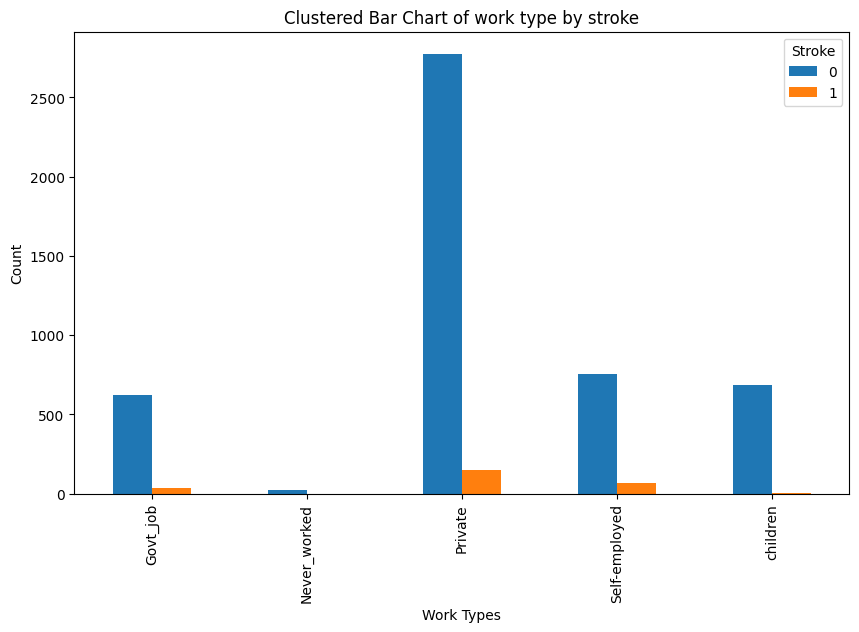

In [31]:
contingency_table = pd.crosstab(dt['work_type'], dt['stroke'])
print(contingency_table)
# Clustered bar chart
contingency_table.plot(kind='bar', figsize=(10, 6))
plt.title('Clustered Bar Chart of work type by stroke')
plt.xlabel('Work Types')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.show()

our further investigation revealed that private employees have the highest proportion of strokes, followed by self-employed individuals. This suggests that these two work types might be associated with an increased risk of stroke compared to other work types in the dataset.

Stress and Workload: Private employees and self-employed individuals might experience higher levels of stress and longer working hours, which could contribute to stroke risk.
Lifestyle Factors: These work types might be associated with certain lifestyle factors (e.g., less physical activity, unhealthy eating habits) that increase the risk of stroke.

stroke                   0         1
smoking_status                      
Unknown          96.955959  3.044041
formerly smoked  92.090395  7.909605
never smoked     95.243129  4.756871
smokes           94.676806  5.323194


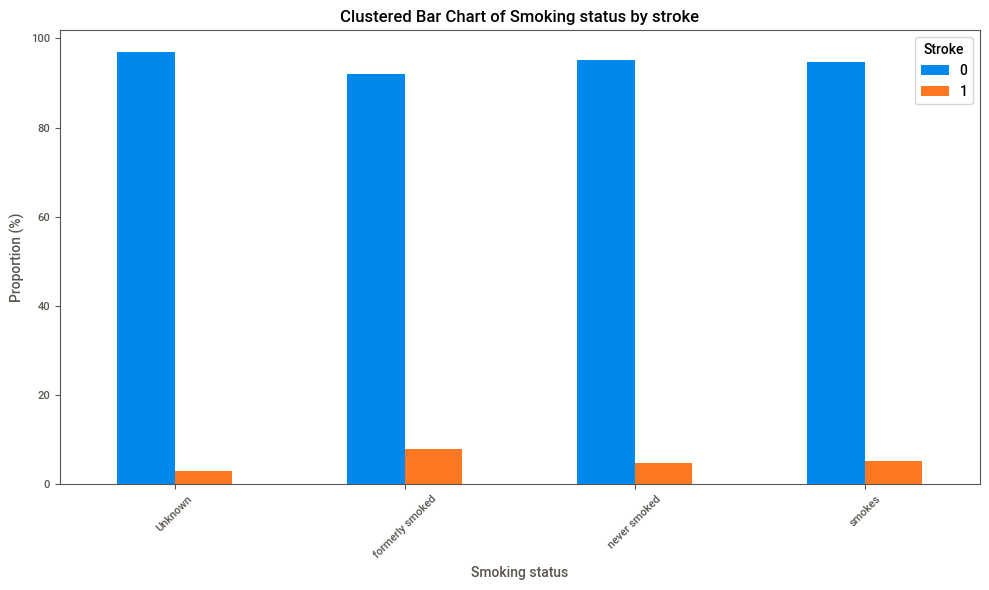

In [ ]:
contingency_table = pd.crosstab(dt['smoking_status'], dt['stroke'])
# Calculate proportions
stroke_proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)*100
print(stroke_proportions)

# Clustered bar chart
stroke_proportions.plot(kind='bar', figsize=(10, 6))
plt.title('Clustered Bar Chart of Smoking status by stroke')
plt.xlabel('Smoking status')
plt.ylabel('Proportion (%)')
plt.legend(title='Stroke')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Highest Stroke Proportion: "Formerly Smoked" has the highest proportion of individuals who had a stroke (7.89%).
Second Highest: "Never Smoked" and "Smokes" have relatively similar proportions (4.76% and 5.32%, respectively).
Lowest: "Unknown" has the lowest proportion of stroke (3.04%).

Formerly Smoked: The higher proportion of stroke in the "Formerly Smoked" category is interesting. It could indicate that even though these individuals quit smoking, the long-term effects of smoking might still contribute to an increased risk of stroke.

Never Smoked vs. Smokes: The proportions of stroke in "Never Smoked" and "Smokes" categories are somewhat similar in this dataset. However, it's important to remember that this is just one study, and other research has consistently shown a strong link between current smoking and increased stroke risk.

Unknown: The "Unknown" category has the lowest proportion of stroke, but this might be due to various reasons (e.g., data collection limitations) and should be interpreted with caution.

Confounding Variables: Other factors like age, gender, and underlying health conditions could be influencing these proportions. Further analysis controlling for these factors would provide a clearer understanding.

Sample Size: The size of each smoking status category can also affect the proportions. Smaller categories might have more variability in their stroke proportions due to chance.

External Validity: These findings might not be generalizable to other populations or settings.

##Based on this chi-squared test, we can conclude that there is a statistically significant relationship between ever being married and the likelihood of having a stroke. The observed frequencies of stroke in the "ever married" and "not ever married" categories are unlikely due to chance and suggest a true association between the variables.

stroke                0         1
ever_married                     
No            98.349459  1.650541
Yes           93.438712  6.561288
stroke           0    1
ever_married           
No            1728   29
Yes           3133  220


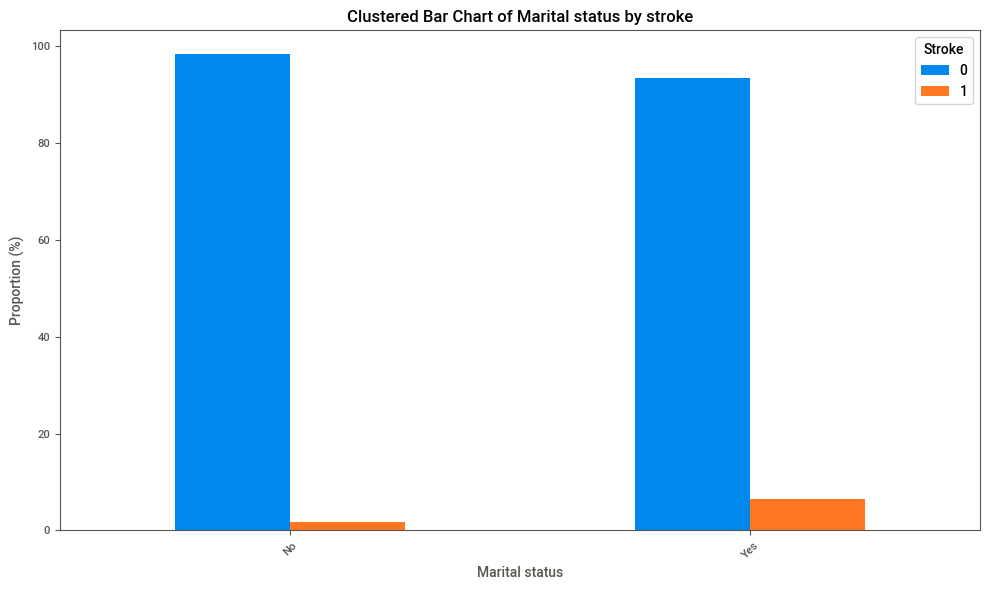

In [ ]:
contingency_table = pd.crosstab(dt['ever_married'], dt['stroke'])
# Calculate proportions
stroke_proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)*100
print(stroke_proportions)
print(contingency_table)
# Clustered bar chart
stroke_proportions.plot(kind='bar', figsize=(10, 6))
plt.title('Clustered Bar Chart of Marital status by stroke')
plt.xlabel('Marital status')
plt.ylabel('Proportion (%)')
plt.legend(title='Stroke')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Interesting : Married individuals have higher proportion of stroke compared to never married folks. This looks counterintuitive. Possible reasons:

Lifestyle Changes After Marriage: While marriage is often associated with positive social support, it could also lead to lifestyle changes that might increase stroke risk. For example, some individuals might become less physically active or adopt less healthy dietary habits after marriage. These changes could contribute to an increased risk of stroke over time.

Stress and Responsibilities: Marriage can come with its own set of stressors and responsibilities, such as financial pressures, raising children, and managing household duties. These stressors, if not managed effectively, could potentially contribute to an increased risk of stroke.

####Based on this chi-squared test, we can conclude that there is a statistically significant relationship between heart disease and the likelihood of having a stroke.

stroke                 0          1
heart_disease                      
0              95.821266   4.178734
1              82.971014  17.028986
stroke            0    1
heart_disease           
0              4632  202
1               229   47


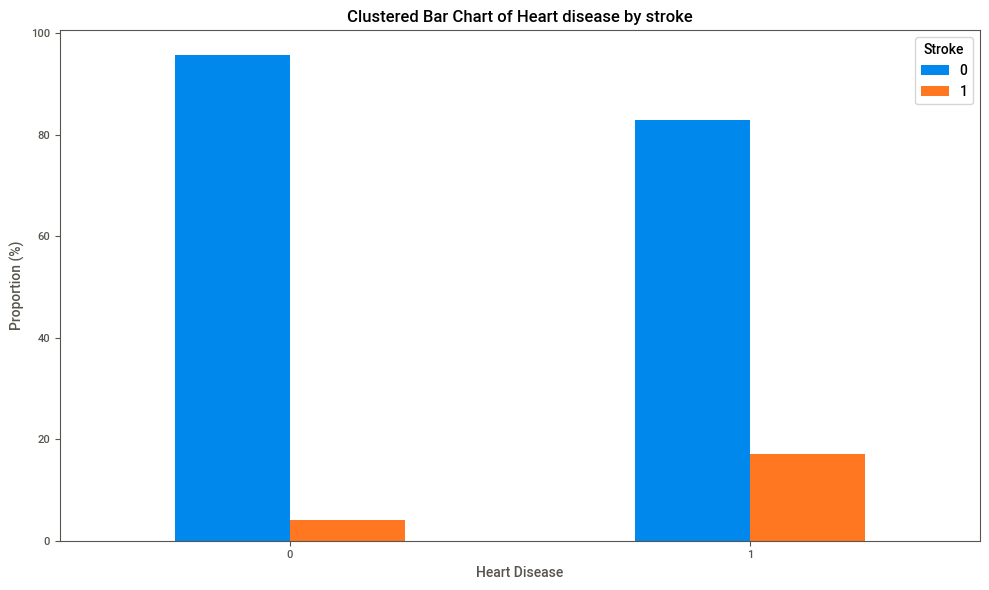

In [ ]:
contingency_table = pd.crosstab(dt['heart_disease'], dt['stroke'])
# Calculate proportions
stroke_proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)*100
print(stroke_proportions)
print(contingency_table)
# Clustered bar chart
stroke_proportions.plot(kind='bar', figsize=(10, 6))
plt.title('Clustered Bar Chart of Heart disease by stroke')
plt.xlabel('Heart Disease')
plt.ylabel('Proportion (%)')
plt.legend(title='Stroke')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Association: We already know from the chi-squared test that there is a statistically significant association between heart_disease and stroke (p-value < 0.05). This means the likelihood of having a stroke is not the same for those with and without heart disease.

Proportions: Now, looking at the proportions within each category:

0 (No Heart Disease): 4.18% of individuals without heart disease had a stroke.
1 (Heart Disease): 17.03% of individuals with heart disease had a stroke.
Comparison: The proportion of stroke is significantly higher among individuals with heart disease (17.03%) compared to those without heart disease (4.18%).

Conclusion:

Based on this contingency table and the chi-squared test results, we can conclude that there is a strong association between heart disease and stroke. Individuals with heart disease have a much higher likelihood of having a stroke compared to those without heart disease.

Possible Explanations:

Shared Risk Factors: Heart disease and stroke share many common risk factors, such as high blood pressure, high cholesterol, diabetes, smoking, and obesity. These shared risk factors can contribute to the development of both conditions.
Underlying Mechanisms: Heart disease can directly increase the risk of stroke through mechanisms like blood clots, irregular heart rhythms (atrial fibrillation), and reduced blood flow to the brain.
Vascular Damage: Both heart disease and stroke involve damage to blood vessels. Damage to blood vessels in the heart can increase the risk of blood clots forming and traveling to the brain, causing a stroke.

####Based on this chi-squared test, we can conclude that there is a statistically significant relationship between hypertention and the likelihood of having a stroke.

stroke                0          1
hypertension                      
0             96.032090   3.967910
1             86.746988  13.253012
stroke           0    1
hypertension           
0             4429  183
1              432   66


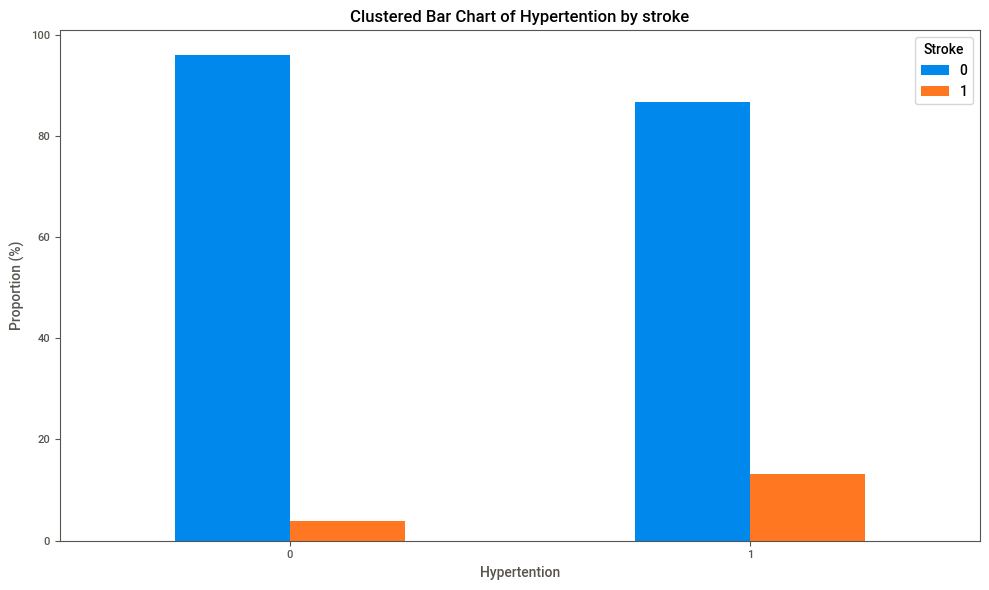

In [ ]:
contingency_table = pd.crosstab(dt['hypertension'], dt['stroke'])
# Calculate proportions
stroke_proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)*100
print(stroke_proportions)
print(contingency_table)
# Clustered bar chart
stroke_proportions.plot(kind='bar', figsize=(10, 6))
plt.title('Clustered Bar Chart of Hypertention by stroke')
plt.xlabel('Hypertention')
plt.ylabel('Proportion (%)')
plt.legend(title='Stroke')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Association: We know from previous chi-squared test results that there is a statistically significant association between hypertension and stroke (p-value < 0.05). This means the likelihood of having a stroke is not the same for those with and without hypertension.

Proportions: Now, looking at the proportions within each category:

0 (No Hypertension): 3.97% of individuals without hypertension had a stroke.
1 (Hypertension): 13.25% of individuals with hypertension had a stroke.
Comparison: The proportion of stroke is significantly higher among individuals with Hypertension (13.25%) compared to those without Hypertension (3.97%).

1. Vascular Damage
Endothelial Dysfunction: Chronic high blood pressure can damage the endothelial lining of blood vessels, leading to atherosclerosis (hardening and narrowing of the arteries). This can increase the risk of blood clots, which can obstruct blood flow to the brain, causing ischemic strokes.
Arterial Stiffness: Hypertension causes arteries to become stiff and less elastic, which can impair blood flow and increase the risk of rupture.
2. Atherosclerosis
Individuals with hypertension are more prone to develop atherosclerosis due to the increased pressure exerted on arterial walls. This condition leads to the formation of plaques that can block blood flow or break off and travel to the brain, causing a stroke.
3. Increased Blood Clot Formation
Elevated blood pressure can lead to changes in blood viscosity and flow dynamics, making it easier for clots to form. These clots can travel to the brain and block blood flow, resulting in a stroke.
4. Left Ventricular Hypertrophy
Chronic hypertension can lead to left ventricular hypertrophy (enlargement of the heart's left ventricle). This condition can increase the risk of arrhythmias and can contribute to the development of embolic strokes, where a clot formed in the heart travels to the brain.
5. Hemorrhagic Stroke Risk
High blood pressure can weaken blood vessels in the brain, making them more susceptible to rupture. This can result in hemorrhagic strokes, where bleeding occurs in or around the brain.
6. Obesity and Metabolic Syndrome
Many individuals with hypertension also suffer from obesity and metabolic syndrome, conditions that are linked to an increased risk of stroke. These conditions contribute to inflammation and further vascular damage.
7. Lifestyle Factors
Individuals with hypertension may have other risk factors for stroke, such as sedentary lifestyle, poor diet, excessive alcohol consumption, and smoking, which compound the risk.
8. Chronic Kidney Disease
Hypertension is a major risk factor for chronic kidney disease, which can contribute to fluid overload and worsen blood pressure control, further increasing stroke risk.

In [32]:
dt.dtypes

,0
id,int64
gender,category
age,float64
hypertension,category
heart_disease,category
ever_married,category
work_type,category
Residence_type,category
avg_glucose_level,float64
bmi,float64


In [33]:
dt.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [34]:
print(dt.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [35]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1.0,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0,1,0,0
1,51676,0.0,61.0,0,0,1,0,202.21,28.893237,1,0,0,1,0,0,1,0
2,31112,1.0,80.0,0,1,1,0,105.92,32.500000,1,0,1,0,0,0,1,0
3,60182,0.0,49.0,0,0,1,1,171.23,34.400000,1,0,1,0,0,0,0,1
4,1665,0.0,79.0,1,0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0


In [ ]:
# Convert categorical variables to numerical using one-hot encoding
# Convert categorical variables to numerical using one-hot encoding
# Convert 'Residence_type' to numerical before one-hot encoding
dt['Residence_type'] = dt['Residence_type'].map({'Urban': 1, 'Rural': 0})
dt['ever_married'] = dt['ever_married'].map({'Yes': 1, 'No': 0})
df = pd.get_dummies(dt, columns=['gender', 'work_type', 'smoking_status'], drop_first=True)

# Define features (X) and target variable (y)
X = df.drop('stroke', axis=1)  # Features
y = df['stroke']                # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Create a frequency table for the 'gender' variable
frequency_table = dt['stroke'].value_counts().reset_index()


# Display the frequency table
print(frequency_table)


  stroke  count
0      0   4861
1      1    249


Confusion Matrix:
[[971   1]
 [ 49   1]]

Accuracy: 0.9510763209393346

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.50      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.73      0.51      0.51      1022
weighted avg       0.93      0.95      0.93      1022



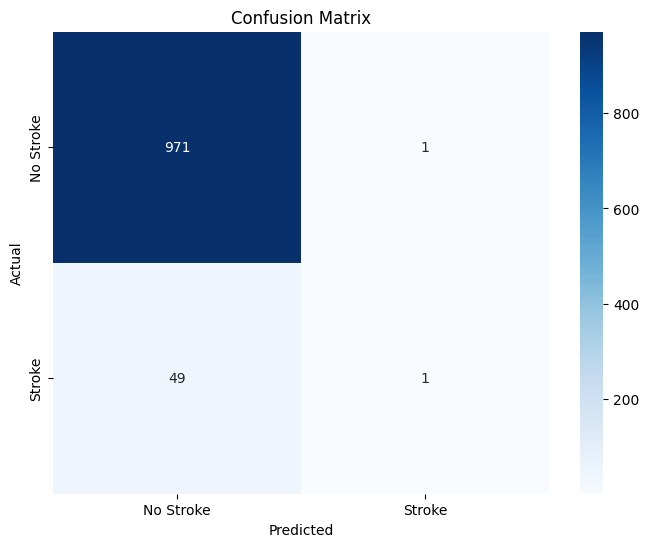

In [ ]:
# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", class_report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

The classification report provides detailed metrics for each class:

Precision:

Class 0: 0.95 (95% of the predicted class 0 are actually class 0)
Class 1: 0.50 (50% of the predicted class 1 are actually class 1)
Precision indicates the accuracy of positive predictions. High precision for class 0 indicates that the model is very good at predicting the majority class correctly.

Recall:

Class 0: 1.00 (the model correctly identifies all actual class 0 instances)
Class 1: 0.02 (only 2% of actual class 1 instances are identified correctly)
Recall indicates how well the model identifies actual positive cases. The model struggles significantly with class 1.

F1-Score:

Class 0: 0.97 (harmonic mean of precision and recall for class 0)
Class 1: 0.04 (low f1-score indicating poor performance)
The F1-score is useful when you want a balance between precision and recall, especially when dealing with imbalanced classes.

Support:

Class 0: 972 instances
Class 1: 50 instances
Support indicates the number of actual occurrences of the class in the specified dataset.

Macro and Weighted Averages:

Macro Avg: Averages the precision, recall, and f1-score across classes, treating all classes equally. This can be misleading in imbalanced datasets.
Weighted Avg: Takes the support of each class into account, providing a better overall performance metric for imbalanced datasets.
Key Observations
Imbalanced Dataset: The model performs exceptionally well for class 0 but poorly for class 1. This is evident from the low recall and F1-score for class 1. With only 50 instances of class 1 compared to 972 instances of class 0, the dataset is imbalanced.

Potential Solutions: To improve the model’s performance on the minority class (class 1), consider the following techniques:

Resampling: Use oversampling techniques (like SMOTE) to generate synthetic instances of the minority class or undersample the majority class.
Adjusting Class Weights: Use class weights to give more importance to the minority class during model training.
Different Algorithms: Consider using algorithms that handle imbalanced datasets better, such as Random Forest or Gradient Boosting with specific configurations.
Conclusion
While the model shows high overall accuracy, it fails to predict the minority class effectively, as indicated by the classification report. Addressing class imbalance and improving the recall for the minority class will be crucial steps in enhancing the model's performance.

###Addressing data imbalance issue

In [36]:
# Prepare the data
X = df.drop(columns=['stroke'])  # Remove the target variable from the DataFrame
y = df['stroke']  # Target variable

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the input data
X_scaled = scaler.fit_transform(X)

# If you want to keep X as a DataFrame, you can do the following:
X = pd.DataFrame(X_scaled, columns=X.columns)

In [37]:
# Split the data into training and testing sets
# Here we use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Applying SMOTE to balance the classes
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [39]:
from imblearn.over_sampling import SMOTE

# Split the dataset into training and test sets (before balancing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the distribution of the resampled dataset
print("Original target counts:")
print(y_train.value_counts())
print("Resampled target counts:")
print(pd.Series(y_train_balanced).value_counts())

# Create and train the Random Forest model on balanced data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Get feature importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Drop 'id' if present
if 'id' in feature_importance_df['Feature'].values:
    feature_importance_df = feature_importance_df[feature_importance_df['Feature'] != 'id']

# Set a threshold for feature selection
threshold = 0.02
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]

# Filter the dataset to keep only selected features
X_train_selected = X_train_balanced[selected_features['Feature']]
X_test_selected = X_test[selected_features['Feature']]

print("Selected features based on threshold:")
print(selected_features)

Original target counts:
stroke
0    3889
1     199
Name: count, dtype: int64
Resampled target counts:
stroke
0    3889
1    3889
Name: count, dtype: int64
Selected features based on threshold:
                        Feature  Importance
1                        gender    0.045785
2                           age    0.358367
3                  hypertension    0.028473
5                  ever_married    0.080729
6                Residence_type    0.047547
7             avg_glucose_level    0.107375
8                           bmi    0.109697
10            work_type_Private    0.029678
14  smoking_status_never smoked    0.023382


In [40]:
# Convert to DataFrame
new_df = pd.DataFrame(X_train_balanced)
new_df['stroke'] = y_train_balanced  # Adding the target variable
# Display the data
print(new_df.shape)


(7778, 17)


##Logistic regressions

Logistic - Accuracy: 0.75, AUC: 0.85, Precision: 0.14, Recall: 0.80, F1_Score: 0.24
Lasso - Accuracy: 0.75, AUC: 0.85, Precision: 0.14, Recall: 0.80, F1_Score: 0.24
Ridge - Accuracy: 0.75, AUC: 0.85, Precision: 0.14, Recall: 0.80, F1_Score: 0.24


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Elastic_net - Accuracy: 0.75, AUC: 0.85, Precision: 0.14, Recall: 0.80, F1_Score: 0.24


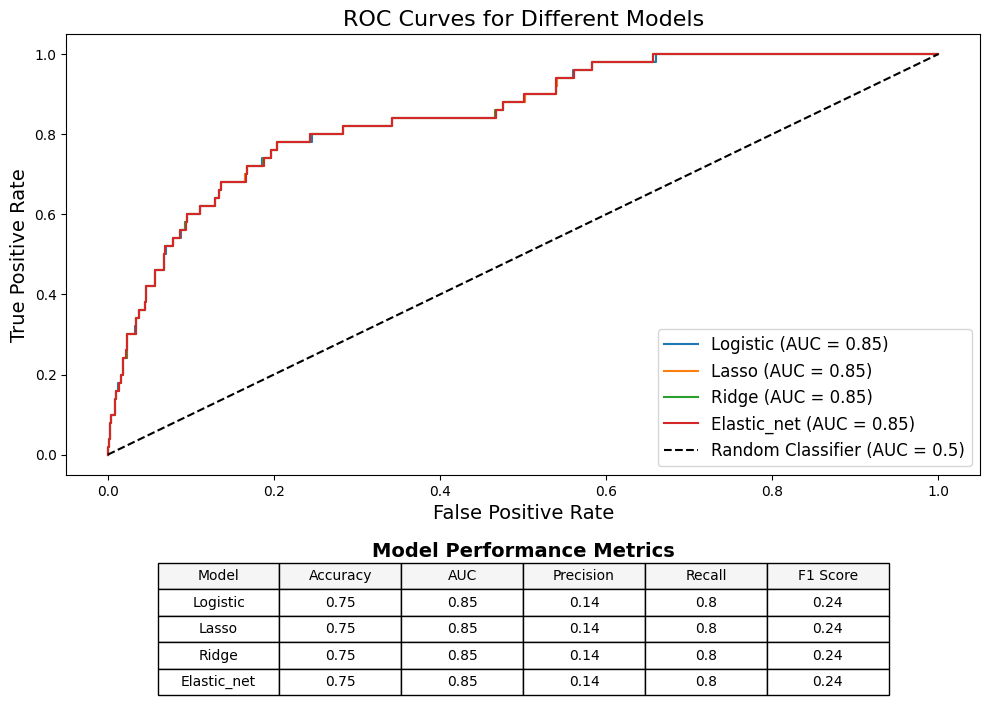

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import numpy as np
from sklearn.linear_model import LogisticRegression

# Models list (already provided)
models = [
    ('Logistic', LogisticRegression(max_iter=5000, solver='liblinear')),
    ('Lasso', LogisticRegression(penalty='l1', solver='liblinear', C=10)),
    ('Ridge', LogisticRegression(penalty='l2', solver='liblinear', C=10)),
    ('Elastic_net', LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=10))
]

# Store results
results = []
names = []

# Create a figure for the ROC curves and table
fig, ax = plt.subplots(figsize=(10, 8))

# Evaluate each model
for name, model in models:
    model.fit(X_resampled, y_resampled)  # Fit the model with resampled data
    predictions = model.predict(X_test)  # Get predictions

    # Calculate various metrics
    accuracy = round(accuracy_score(y_test, predictions), 2)
    precision = round(precision_score(y_test, predictions), 2)
    recall = round(recall_score(y_test, predictions), 2)
    f1score = round(f1_score(y_test, predictions, average='binary'), 2)

    # Calculate AUC (only for models with predict_proba)
    if hasattr(model, 'predict_proba'):
        probas = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
        auc_score = round(roc_auc_score(y_test, probas), 2)  # Calculate AUC score
    else:
        auc_score = np.nan  # For models that don't support predict_proba

    # Store results
    results.append([name, accuracy, auc_score, precision, recall, f1score])
    names.append(name)

    # Print the metrics
    print(f"{name} - Accuracy: {accuracy:.2f}, AUC: {auc_score:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1_Score: {f1score:.2f}")

    # Plot the ROC curve
    if hasattr(model, 'predict_proba'):
        fpr, tpr, _ = roc_curve(y_test, probas)  # Get ROC curve
        ax.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')  # Plot ROC curve

# Plot the diagonal line for a random classifier (AUC = 0.5)
ax.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')

# Customize the plot
ax.set_title('ROC Curves for Different Models', fontsize=16)
ax.set_xlabel('False Positive Rate', fontsize=14)
ax.set_ylabel('True Positive Rate', fontsize=14)

# Adjust the legend font size here
ax.legend(loc='lower right', fontsize=12)

# Add a table below the ROC curve
# Create a table of model performance metrics
table_data = results

# Set up column labels
columns = ['Model', 'Accuracy', 'AUC', 'Precision', 'Recall', 'F1 Score']

# Add the table to the plot
# Adjust the bbox parameters to create space between title and table
table = ax.table(cellText=table_data, colLabels=columns, loc='bottom', cellLoc='center', bbox=[0.1, -0.5, 0.8, 0.3], colColours=["#f5f5f5"] * len(columns))

# Set the font size of the table text
table.auto_set_font_size(False)
table.set_fontsize(10)

# Add table title above the table, with more space between title and table
# Here we set y=-0.4, ensuring the title is above the table
ax.text(0.5, -0.24, 'Model Performance Metrics', ha='center', va='center', fontsize=14, weight='bold')

# Adjust layout to make room for the table and title
plt.tight_layout()
plt.subplots_adjust(bottom=0.4)  # Slightly more space below to ensure no overlap

# Show the plot with ROC curve and the table below
plt.show()


Logistic - Accuracy: 0.75, AUC: 0.85, Precision: 0.14, Recall: 0.80, F1_Score: 0.24, TPR: 0.8, TNR: 0.75
Lasso - Accuracy: 0.75, AUC: 0.85, Precision: 0.14, Recall: 0.80, F1_Score: 0.24, TPR: 0.8, TNR: 0.75
Ridge - Accuracy: 0.75, AUC: 0.85, Precision: 0.14, Recall: 0.80, F1_Score: 0.24, TPR: 0.8, TNR: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Elastic_net - Accuracy: 0.75, AUC: 0.85, Precision: 0.14, Recall: 0.80, F1_Score: 0.24, TPR: 0.8, TNR: 0.75


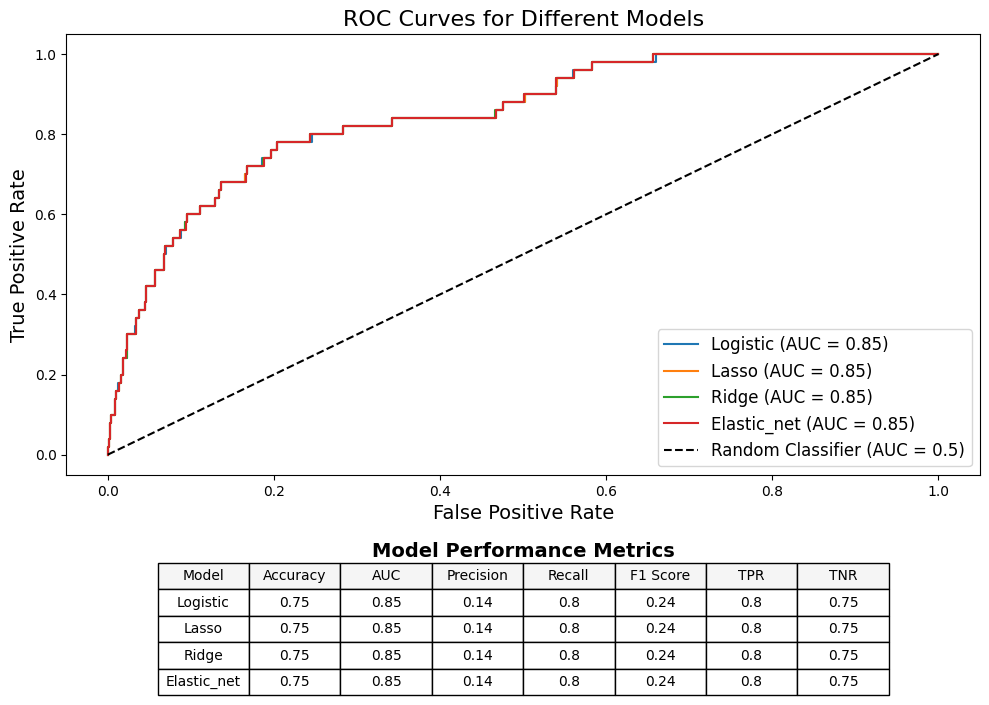

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import numpy as np
from sklearn.linear_model import LogisticRegression

# Models list (already provided)
models = [
    ('Logistic', LogisticRegression(max_iter=5000, solver='liblinear')),
    ('Lasso', LogisticRegression(penalty='l1', solver='liblinear', C=10)),
    ('Ridge', LogisticRegression(penalty='l2', solver='liblinear', C=10)),
    ('Elastic_net', LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=10))
]

# Store results
results = []
names = []

# Create a figure for the ROC curves and table
fig, ax = plt.subplots(figsize=(10, 8))

# Evaluate each model
for name, model in models:
    model.fit(X_resampled, y_resampled)  # Fit the model with resampled data
    predictions = model.predict(X_test)  # Get predictions

    # Calculate various metrics
    accuracy = round(accuracy_score(y_test, predictions), 2)
    precision = round(precision_score(y_test, predictions), 2)
    recall = round(recall_score(y_test, predictions), 2)
    f1score = round(f1_score(y_test, predictions, average='binary'), 2)

    # Calculate Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

    # Calculate True Positive Rate (TPR) and True Negative Rate (TNR)
    tpr = round(tp / (tp + fn), 2) if (tp + fn) > 0 else 0  # True Positive Rate (Recall)
    tnr = round(tn / (tn + fp), 2) if (tn + fp) > 0 else 0  # True Negative Rate (Specificity)

    # Calculate AUC (only for models with predict_proba)
    if hasattr(model, 'predict_proba'):
        probas = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
        auc_score = round(roc_auc_score(y_test, probas), 2)  # Calculate AUC score
    else:
        auc_score = np.nan  # For models that don't support predict_proba

    # Store results
    results.append([name, accuracy, auc_score, precision, recall, f1score, tpr, tnr])
    names.append(name)

    # Print the metrics
    print(f"{name} - Accuracy: {accuracy:.2f}, AUC: {auc_score:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1_Score: {f1score:.2f}, TPR: {tpr}, TNR: {tnr}")

    # Plot the ROC curve
    if hasattr(model, 'predict_proba'):
        fpr, tpr_curve, _ = roc_curve(y_test, probas)  # Get ROC curve
        # Plot the ROC curve for this model
        ax.plot(fpr, tpr_curve, label=f'{name} (AUC = {auc_score:.2f})')

# Plot the diagonal line for a random classifier (AUC = 0.5)
ax.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')

# Customize the plot
ax.set_title('ROC Curves for Different Models', fontsize=16)
ax.set_xlabel('False Positive Rate', fontsize=14)
ax.set_ylabel('True Positive Rate', fontsize=14)

# Adjust the legend font size here
ax.legend(loc='lower right', fontsize=12)

# Add a table below the ROC curve
# Create a table of model performance metrics
table_data = results

# Set up column labels
columns = ['Model', 'Accuracy', 'AUC', 'Precision', 'Recall', 'F1 Score', 'TPR', 'TNR']

# Add the table to the plot
# Adjust the bbox parameters to create space between title and table
table = ax.table(cellText=table_data, colLabels=columns, loc='bottom', cellLoc='center', bbox=[0.1, -0.5, 0.8, 0.3], colColours=["#f5f5f5"] * len(columns))

# Set the font size of the table text
table.auto_set_font_size(False)
table.set_fontsize(10)

# Manually adjust column widths (set width of specific columns if needed)
#table.auto_set_column_width([0, 1, 2, 3, 4, 5, 6, 7])  # This makes sure all columns are wide enough
# Set the same width for all columns (same value for all columns)
col_width = 0.25  # Fixed width for all columns


# Add table title above the table, with more space between title and table
# Here we set y=-0.4, ensuring the title is above the table
ax.text(0.5, -0.24, 'Model Performance Metrics', ha='center', va='center', fontsize=14, weight='bold')

# Adjust layout to make room for the table and title
plt.tight_layout()
plt.subplots_adjust(bottom=0.4)  # Slightly more space below to ensure no overlap

# Show the plot with ROC curve and the table below
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3121, number of negative: 3120
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2394
[LightGBM] [Info] Number of data points in the train set: 6241, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500080 -> initscore=0.000320
[LightGBM] [Info] Start training from score 0.000320
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3120, number of negative: 3121
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise

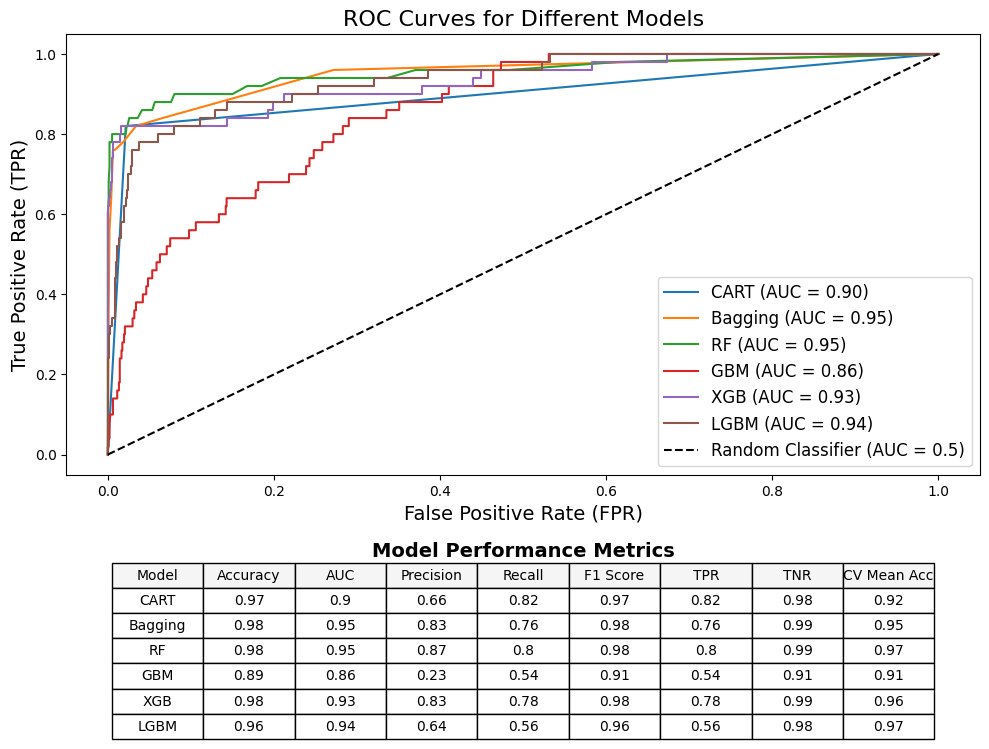

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
import logging

# Suppress all warnings from XGBoost
warnings.filterwarnings("ignore", category=UserWarning, module='xgboost')
# Suppress all UserWarnings from LightGBM
warnings.filterwarnings("ignore", category=UserWarning, module='lightgbm')


# Define models
models = [
    ('CART', DecisionTreeClassifier()),
    ('Bagging', BaggingClassifier()),
    ('RF', RandomForestClassifier()),
    ('GBM', GradientBoostingClassifier()),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=True)),  # To avoid warnings
    ('LGBM', LGBMClassifier(verbosity=1))
]

# Store results
results = []
names = []

# Define cross-validation strategy (e.g., Stratified K-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a figure for the ROC curves and table
fig, ax = plt.subplots(figsize=(10, 8))

# Evaluate each model using cross-validation
for name, model in models:
    # Perform cross-validation
    cv_results = cross_val_score(model, X_resampled, y_resampled, cv=cv, scoring='accuracy')  # You can change the scoring to 'f1', 'roc_auc', etc.

    # Calculate average score across all folds
    mean_accuracy = round(cv_results.mean(), 2)

    # Fit the model on the whole dataset and evaluate on test data (for metrics like Precision, Recall, etc.)
    model.fit(X_resampled, y_resampled)  # Fit on the entire resampled data
    predictions = model.predict(X_test)  # Get predictions

    # Calculate other metrics
    accuracy = round(accuracy_score(y_test, predictions), 2)
    precision = round(precision_score(y_test, predictions), 2)
    recall = round(recall_score(y_test, predictions), 2)
    f1score = round(f1_score(y_test, predictions, average='weighted'), 2)

    # Calculate Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

    # Calculate True Positive Rate (TPR) and True Negative Rate (TNR)
    tpr = round(tp / (tp + fn), 2) if (tp + fn) > 0 else 0  # True Positive Rate (Recall)
    tnr = round(tn / (tn + fp), 2) if (tn + fp) > 0 else 0  # True Negative Rate (Specificity)

    # Calculate AUC (only for models with predict_proba)
    if hasattr(model, 'predict_proba'):
        probas = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
        auc_score = round(roc_auc_score(y_test, probas), 2)  # Calculate AUC score
    else:
        auc_score = np.nan  # For models that don't support predict_proba

    # Store results
    results.append([name, accuracy, auc_score, precision, recall, f1score, tpr, tnr, mean_accuracy])
    names.append(name)

    # Print the metrics
    #print(f"{name} - Accuracy: {accuracy:.2f}, AUC: {auc_score:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1_Score: {f1score:.2f}, TPR: {tpr}, TNR: {tnr}, CV Mean Accuracy: {mean_accuracy:.2f}")

    # Plot the ROC curve
    if hasattr(model, 'predict_proba'):
        fpr, tpr_curve, _ = roc_curve(y_test, probas)  # Get ROC curve
        # Plot the ROC curve for this model
        ax.plot(fpr, tpr_curve, label=f'{name} (AUC = {auc_score:.2f})')

# Plot the diagonal line for a random classifier (AUC = 0.5)
ax.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')

# Customize the plot
ax.set_title('ROC Curves for Different Models', fontsize=16)
ax.set_xlabel('False Positive Rate (FPR)', fontsize=14)
ax.set_ylabel('True Positive Rate (TPR)', fontsize=14)
ax.legend(loc='lower right', fontsize=12)

# Add a table below the ROC curve
# Create a table of model performance metrics
table_data = results

# Set up column labels
columns = ['Model', 'Accuracy', 'AUC', 'Precision', 'Recall', 'F1 Score', 'TPR', 'TNR', 'CV Mean Acc']

# Add the table to the plot
# Adjust the bbox parameters to create space between title and table
bbox = [0.05, -0.6, 0.9, 0.4]  # Center table horizontally, adjust size and vertical position
table = ax.table(cellText=table_data, colLabels=columns, loc='bottom', cellLoc='center', bbox=bbox, colColours=["#f5f5f5"] * len(columns))

# Set the font size of the table text
table.auto_set_font_size(False)
table.set_fontsize(10)

# Adjust the title position: move it above the plot, taking into account the table
title_y_position = -0.24  # Adjust this value to place the title above the plot
ax.text(0.5, title_y_position, 'Model Performance Metrics', ha='center', va='center', fontsize=14, weight='bold')

# Adjust layout to make room for the table and title
plt.tight_layout()
plt.subplots_adjust(bottom=0.4)  # Slightly more space below to ensure no overlap

# Show the plot with ROC curve and the table below
plt.show()

CART - Accuracy: 0.87, AUC: 0.89, Precision: 0.25, Recall: 0.82, F1_Score: 0.90, TPR: 0.82, TNR: 0.88, CV Mean Accuracy: 0.87
Bagging - Accuracy: 0.98, AUC: 0.97, Precision: 0.75, Recall: 0.78, F1_Score: 0.98, TPR: 0.78, TNR: 0.99, CV Mean Accuracy: 0.96
RF - Accuracy: 0.81, AUC: 0.89, Precision: 0.18, Recall: 0.78, F1_Score: 0.86, TPR: 0.78, TNR: 0.81, CV Mean Accuracy: 0.87
GBM - Accuracy: 0.99, AUC: 0.94, Precision: 0.93, Recall: 0.80, F1_Score: 0.99, TPR: 0.8, TNR: 1.0, CV Mean Accuracy: 0.97
XGB - Accuracy: 0.98, AUC: 0.94, Precision: 0.87, Recall: 0.78, F1_Score: 0.98, TPR: 0.78, TNR: 0.99, CV Mean Accuracy: 0.96
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3901, number of negative: 3901
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`

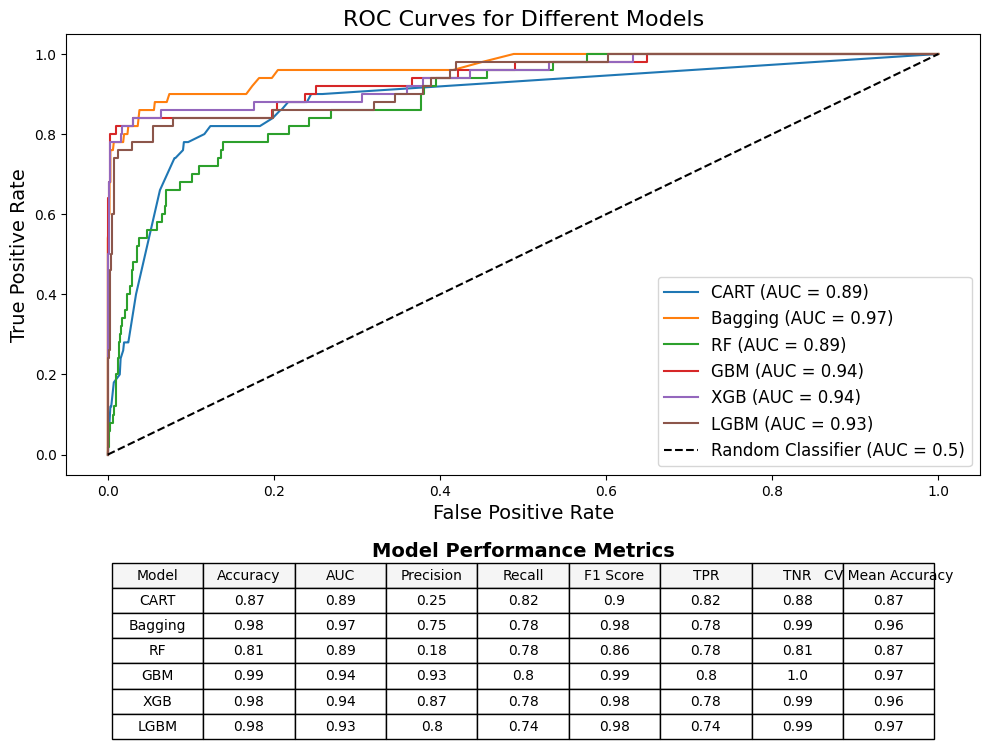

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Define models
models = [
    ('CART', DecisionTreeClassifier()),
    ('Bagging', BaggingClassifier()),
    ('RF', RandomForestClassifier()),
    ('GBM', GradientBoostingClassifier()),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=True)),  # To avoid warnings
    ('LGBM', LGBMClassifier(verbosity=1))
]

# Parameter grids for each model
param_grids = {
    'CART': {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]},
    'Bagging': {'n_estimators': [50, 100, 200], 'max_samples': [0.5, 0.7, 1.0]},
    'RF': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]},
    'GBM': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'XGB': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'LGBM': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
}

# Store results
results = []
names = []

# Define cross-validation strategy (e.g., Stratified K-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a figure for the ROC curves and table
fig, ax = plt.subplots(figsize=(10, 8))

# Evaluate each model using cross-validation
for name, model in models:
    # Set the parameter grid for GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=cv, scoring='accuracy', n_jobs=-1)

    # Fit the grid search model (perform hyperparameter tuning)
    grid_search.fit(X_resampled, y_resampled)

    # Get the best model from grid search
    best_model = grid_search.best_estimator_

    # Perform cross-validation for the best model
    cv_results = cross_val_score(best_model, X_resampled, y_resampled, cv=cv, scoring='accuracy')

    # Calculate average score across all folds
    mean_accuracy = round(cv_results.mean(), 2)

    # Fit the best model on the entire dataset and evaluate on test data
    best_model.fit(X_resampled, y_resampled)  # Fit on the entire resampled data
    predictions = best_model.predict(X_test)  # Get predictions

    # Calculate other metrics
    accuracy = round(accuracy_score(y_test, predictions), 2)
    precision = round(precision_score(y_test, predictions), 2)
    recall = round(recall_score(y_test, predictions), 2)
    f1score = round(f1_score(y_test, predictions, average='weighted'), 2)

    # Calculate Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

    # Calculate True Positive Rate (TPR) and True Negative Rate (TNR)
    tpr = round(tp / (tp + fn), 2) if (tp + fn) > 0 else 0  # True Positive Rate (Recall)
    tnr = round(tn / (tn + fp), 2) if (tn + fp) > 0 else 0  # True Negative Rate (Specificity)

    # Calculate AUC (only for models with predict_proba)
    if hasattr(best_model, 'predict_proba'):
        probas = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
        auc_score = round(roc_auc_score(y_test, probas), 2)  # Calculate AUC score
    else:
        auc_score = np.nan  # For models that don't support predict_proba

    # Store results
    results.append([name, accuracy, auc_score, precision, recall, f1score, tpr, tnr, mean_accuracy])
    names.append(name)

    # Print the metrics
    print(f"{name} - Accuracy: {accuracy:.2f}, AUC: {auc_score:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1_Score: {f1score:.2f}, TPR: {tpr}, TNR: {tnr}, CV Mean Accuracy: {mean_accuracy:.2f}")

    # Plot the ROC curve
    if hasattr(best_model, 'predict_proba'):
        fpr, tpr_curve, _ = roc_curve(y_test, probas)  # Get ROC curve
        # Plot the ROC curve for this model
        ax.plot(fpr, tpr_curve, label=f'{name} (AUC = {auc_score:.2f})')

# Plot the diagonal line for a random classifier (AUC = 0.5)
ax.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')

# Customize the plot
ax.set_title('ROC Curves for Different Models', fontsize=16)
ax.set_xlabel('False Positive Rate', fontsize=14)
ax.set_ylabel('True Positive Rate', fontsize=14)
ax.legend(loc='lower right', fontsize=12)

# Add a table below the ROC curve
# Create a table of model performance metrics
table_data = results

# Set up column labels
columns = ['Model', 'Accuracy', 'AUC', 'Precision', 'Recall', 'F1 Score', 'TPR', 'TNR', 'CV Mean Acc']

# Add the table to the plot
# Adjust the bbox parameters to create space between title and table
bbox = [0.05, -0.6, 0.9, 0.4]  # Center table horizontally, adjust size and vertical position
table = ax.table(cellText=table_data, colLabels=columns, loc='bottom', cellLoc='center', bbox=bbox, colColours=["#f5f5f5"] * len(columns))

# Set the font size of the table text
table.auto_set_font_size(False)
table.set_fontsize(10)

# Adjust the title position: move it above the plot, taking into account the table
title_y_position = -0.24  # Adjust this value to place the title above the plot
ax.text(0.5, title_y_position, 'Model Performance Metrics', ha='center', va='center', fontsize=14, weight='bold')

# Adjust layout to make room for the table and title
plt.tight_layout()
plt.subplots_adjust(bottom=0.4)  # Slightly more space below to ensure no overlap

# Show the plot with ROC curve and the table below
plt.show()


Logistic - Accuracy: 0.7554, AUC: 0.8450, Precision: 0.1667, Recall: 0.7581, F1_Score: 0.2733


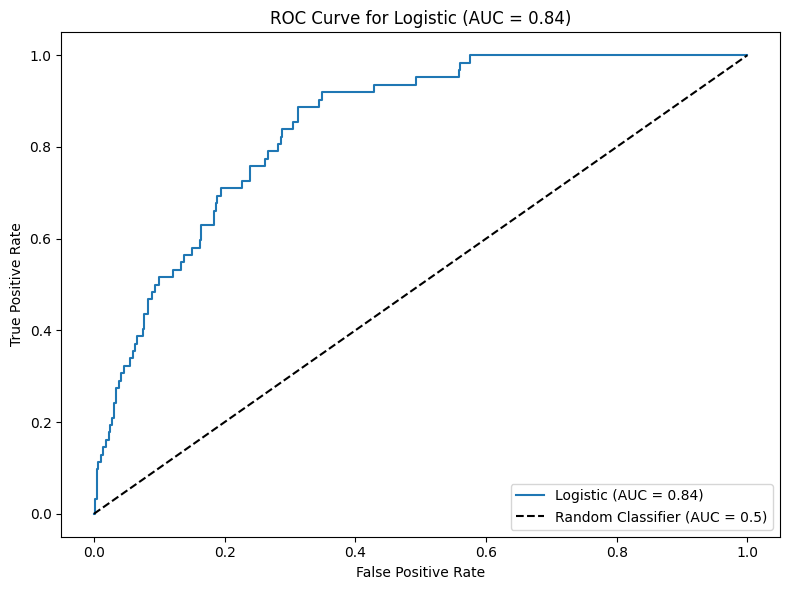

Lasso - Accuracy: 0.7544, AUC: 0.8450, Precision: 0.1661, Recall: 0.7581, F1_Score: 0.2725


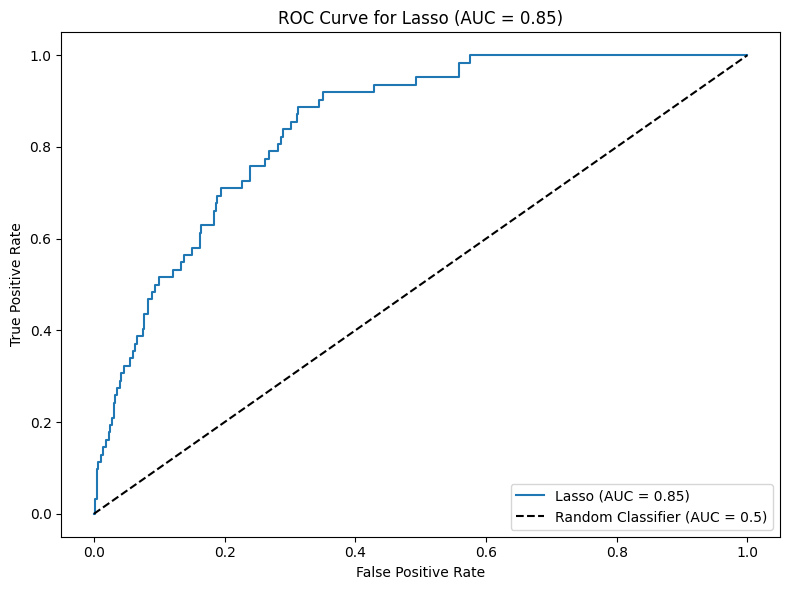

Ridge - Accuracy: 0.7544, AUC: 0.8449, Precision: 0.1661, Recall: 0.7581, F1_Score: 0.2725


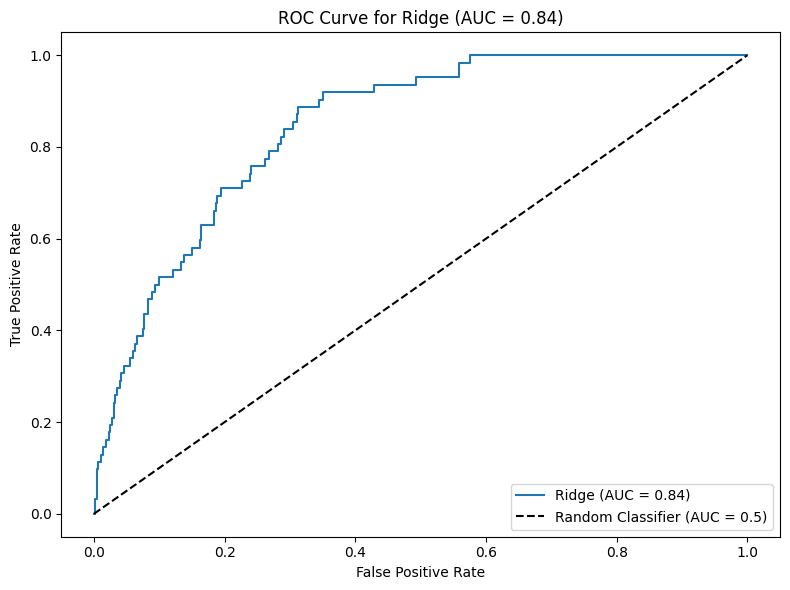

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Elastic_net - Accuracy: 0.7544, AUC: 0.8449, Precision: 0.1661, Recall: 0.7581, F1_Score: 0.2725


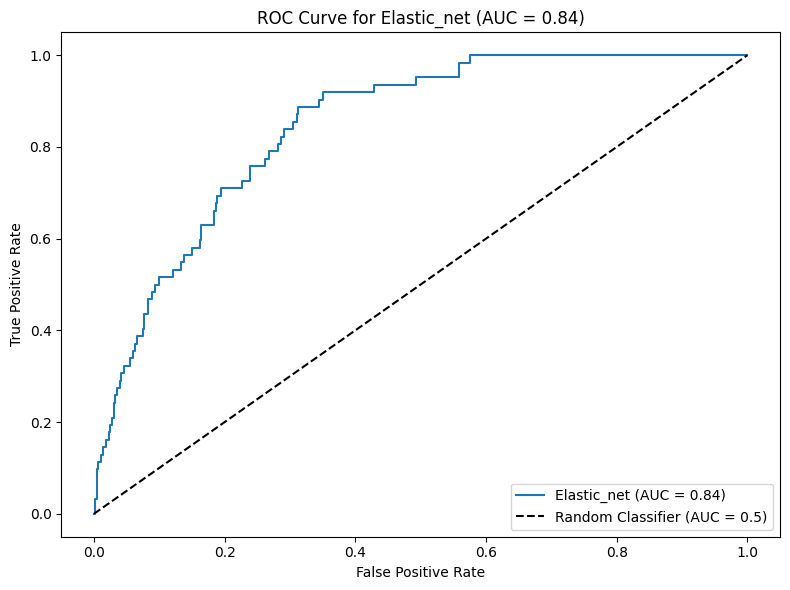

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
import numpy as np

# Models list (already provided)
models = [
    ('Logistic', LogisticRegression(max_iter=5000, solver='liblinear')),
    ('Lasso', LogisticRegression(penalty='l1', solver='liblinear', C=10)),
    ('Ridge', LogisticRegression(penalty='l2', solver='liblinear', C=10)),
    ('Elastic_net', LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=10))
]

# Store results
results = []
names = []
metrics = ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1_Score']

# Evaluate each model
for name, model in models:
    # Fit the model with resampled data
    model.fit(X_resampled, y_resampled)
    predictions = model.predict(X_test)

    # Calculate various metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1score = f1_score(y_test, predictions, average='binary')

    # Calculate AUC (only for models with predict_proba)
    if hasattr(model, 'predict_proba'):
        probas = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
        auc_score = roc_auc_score(y_test, probas)  # Calculate AUC score
    else:
        auc_score = np.nan  # For models that don't support predict_proba

    # Store results
    results.append([accuracy, auc_score, precision, recall, f1score])
    names.append(name)

    # Print the metrics
    print(f"{name} - Accuracy: {accuracy:.4f}, AUC: {auc_score:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1_Score: {f1score:.4f}")

    # Plot the ROC curve for each model in a separate figure
    if hasattr(model, 'predict_proba'):
        fpr, tpr, _ = roc_curve(y_test, probas)  # Get ROC curve

        # Create a new figure for each model
        plt.figure(figsize=(8, 6))

        # Plot ROC curve for the model
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

        # Plot the diagonal line for a random classifier (AUC = 0.5)
        plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')

        # Customize the plot with the model's name
        plt.title(f'ROC Curve for {name} (AUC = {auc_score:.2f})')  # Title with model name and AUC score
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')

        # Show the plot for this model
        plt.tight_layout()
        plt.show()



In [ ]:
#Load libraries and the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.tools as tools
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Define models
models = [
    ('CART', DecisionTreeClassifier()),
    ('Bagging', BaggingClassifier()),
    ('RF', RandomForestClassifier()),
    ('GBM', GradientBoostingClassifier()),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=True)),  # To avoid warnings
    ('LGBM', LGBMClassifier(verbosity=1))
]

results = []
names = []
metrics = ['Accuracy', 'AUC', 'Precision', 'Recall','F1_Score']

# Evaluate each model
for name, model in models:
    model.fit(X_resampled, y_resampled)
    predictions = model.predict(X_test)
    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1score = f1_score(y_test, predictions, average='weighted')
    # Calculate AUC
    # Note: Not all models have predict_proba, e.g., SVC without probability=True
    if hasattr(model, 'predict_proba'):
        probas = model.predict_proba(X_test)[:, 1]
        auc_score = roc_auc_score(y_test, probas)
    else:
        auc_score = np.nan  # Placeholders for models without AUC scores

    results.append([accuracy, auc_score, precision, recall,f1score])
    names.append(name)

    print(f"{name} - Accuracy: {accuracy:.4f}, AUC: {auc_score:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1_Score: {f1score:.4f}")

CART - Accuracy: 0.8562, AUC: 0.5538, Precision: 0.1171, Recall: 0.2097, F1_Score: 0.8747
Bagging - Accuracy: 0.8943, AUC: 0.7145, Precision: 0.1515, Recall: 0.1613, F1_Score: 0.8959
RF - Accuracy: 0.9061, AUC: 0.7753, Precision: 0.0952, Recall: 0.0645, F1_Score: 0.8975
GBM - Accuracy: 0.8415, AUC: 0.7911, Precision: 0.1377, Recall: 0.3065, F1_Score: 0.8683


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:12:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGB - Accuracy: 0.9100, AUC: 0.7585, Precision: 0.1053, Recall: 0.0645, F1_Score: 0.8997
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3901, number of negative: 3901
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2462
[LightGBM] [Info] Number of data points in the train set: 7802, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LGBM - Accuracy: 0.9051, AUC: 0.7849, Precision: 0.0732, Recall: 0.0484, F1_Score: 0.8959


CART - Accuracy: 0.85, AUC: 0.54, Precision: 0.10, Recall: 0.18, F1_Score: 0.87, TPR: 0.18, TNR: 0.9
Bagging - Accuracy: 0.88, AUC: 0.70, Precision: 0.07, Recall: 0.08, F1_Score: 0.88, TPR: 0.08, TNR: 0.93
RF - Accuracy: 0.91, AUC: 0.79, Precision: 0.13, Recall: 0.08, F1_Score: 0.90, TPR: 0.08, TNR: 0.97
GBM - Accuracy: 0.84, AUC: 0.79, Precision: 0.14, Recall: 0.31, F1_Score: 0.87, TPR: 0.31, TNR: 0.88


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:24:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGB - Accuracy: 0.91, AUC: 0.76, Precision: 0.11, Recall: 0.06, F1_Score: 0.90, TPR: 0.06, TNR: 0.96
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3901, number of negative: 3901
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002940 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2462
[LightGBM] [Info] Number of data points in the train set: 7802, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LGBM - Accuracy: 0.91, AUC: 0.78, Precision: 0.07, Recall: 0.05, F1_Score: 0.90, TPR: 0.05, TNR: 0.96


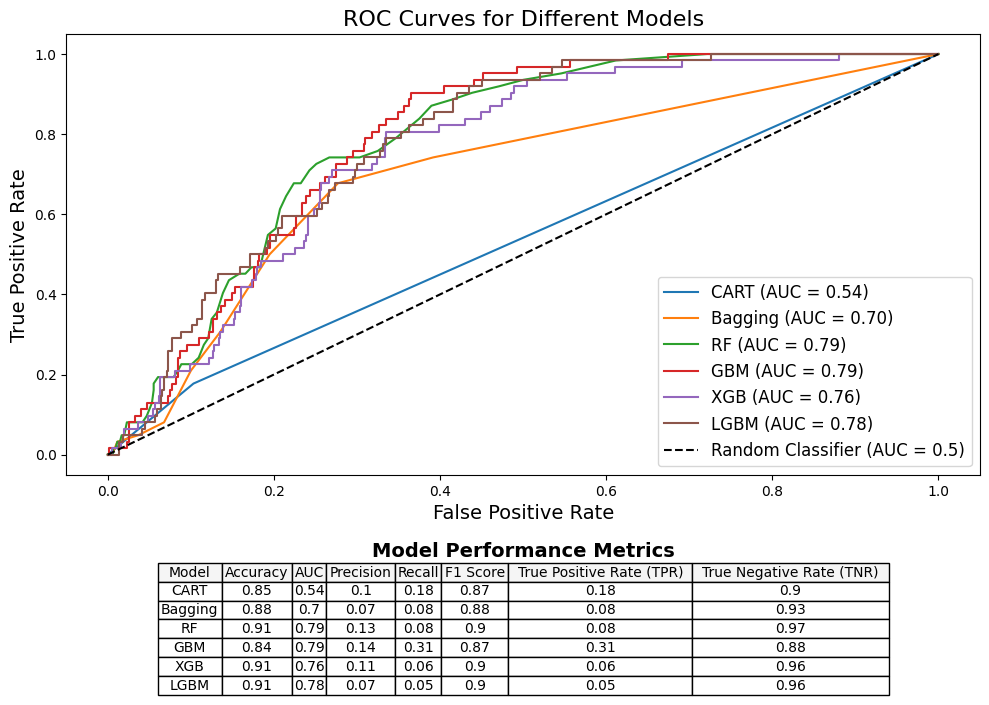

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Define models
models = [
    ('CART', DecisionTreeClassifier()),
    ('Bagging', BaggingClassifier()),
    ('RF', RandomForestClassifier()),
    ('GBM', GradientBoostingClassifier()),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=True)),  # To avoid warnings
    ('LGBM', LGBMClassifier(verbosity=1))
]

# Store results
results = []
names = []

# Create a figure for the ROC curves and table
fig, ax = plt.subplots(figsize=(10, 8))

# Evaluate each model
for name, model in models:
    model.fit(X_resampled, y_resampled)  # Fit the model with resampled data
    predictions = model.predict(X_test)  # Get predictions

    # Calculate various metrics
    accuracy = round(accuracy_score(y_test, predictions), 2)
    precision = round(precision_score(y_test, predictions), 2)
    recall = round(recall_score(y_test, predictions), 2)
    f1score = round(f1_score(y_test, predictions, average='weighted'), 2)

    # Calculate Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

    # Calculate True Positive Rate (TPR) and True Negative Rate (TNR)
    tpr = round(tp / (tp + fn), 2) if (tp + fn) > 0 else 0  # True Positive Rate (Recall)
    tnr = round(tn / (tn + fp), 2) if (tn + fp) > 0 else 0  # True Negative Rate (Specificity)

    # Calculate AUC (only for models with predict_proba)
    if hasattr(model, 'predict_proba'):
        probas = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
        auc_score = round(roc_auc_score(y_test, probas), 2)  # Calculate AUC score
    else:
        auc_score = np.nan  # For models that don't support predict_proba

    # Store results
    results.append([name, accuracy, auc_score, precision, recall, f1score, tpr, tnr])
    names.append(name)

    # Print the metrics
    print(f"{name} - Accuracy: {accuracy:.2f}, AUC: {auc_score:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1_Score: {f1score:.2f}, TPR: {tpr}, TNR: {tnr}")

    # Plot the ROC curve
    if hasattr(model, 'predict_proba'):
        fpr, tpr_curve, _ = roc_curve(y_test, probas)  # Get ROC curve
        # Plot the ROC curve for this model
        ax.plot(fpr, tpr_curve, label=f'{name} (AUC = {auc_score:.2f})')

# Plot the diagonal line for a random classifier (AUC = 0.5)
ax.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')

# Customize the plot
ax.set_title('ROC Curves for Different Models', fontsize=16)
ax.set_xlabel('False Positive Rate', fontsize=14)
ax.set_ylabel('True Positive Rate', fontsize=14)
ax.legend(loc='lower right', fontsize=12)

# Add a table below the ROC curve
# Create a table of model performance metrics
table_data = results

# Set up column labels
columns = ['Model', 'Accuracy', 'AUC', 'Precision', 'Recall', 'F1 Score', 'True Positive Rate (TPR)', 'True Negative Rate (TNR)']

# Add the table to the plot
# Adjust the bbox parameters to create space between title and table
table = ax.table(cellText=table_data, colLabels=columns, loc='bottom', cellLoc='center', bbox=[0.1, -0.5, 0.8, 0.3], colColours=["#f5f5f5"] * len(columns))

# Set the font size of the table text
table.auto_set_font_size(False)
table.set_fontsize(10)

# Manually adjust column widths (set width of specific columns if needed)
table.auto_set_column_width([0, 1, 2, 3, 4, 5, 6, 7])  # This makes sure all columns are wide enough

# Add table title above the table, with more space between title and table
# Here we set y=-0.4, ensuring the title is above the table
ax.text(0.5, -0.24, 'Model Performance Metrics', ha='center', va='center', fontsize=14, weight='bold')

# Adjust layout to make room for the table and title
plt.tight_layout()
plt.subplots_adjust(bottom=0.4)  # Slightly more space below to ensure no overlap

# Show the plot with ROC curve and the table below
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Define models
models = [
    ('CART', DecisionTreeClassifier()),
    ('Bagging', BaggingClassifier()),
    ('RF', RandomForestClassifier()),
    ('GBM', GradientBoostingClassifier()),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=True)),  # To avoid warnings
    ('LGBM', LGBMClassifier(verbosity=1))
]

# Store results
results = []
names = []

# Define cross-validation strategy (e.g., Stratified K-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a figure for the ROC curves and table
fig, ax = plt.subplots(figsize=(10, 8))

# Evaluate each model using cross-validation
for name, model in models:
    # Perform cross-validation
    cv_results = cross_val_score(model, X_resampled, y_resampled, cv=cv, scoring='accuracy')  # You can change the scoring to 'f1', 'roc_auc', etc.

    # Calculate average score across all folds
    mean_accuracy = round(cv_results.mean(), 2)

    # Fit the model on the whole dataset and evaluate on test data (for metrics like Precision, Recall, etc.)
    model.fit(X_resampled, y_resampled)  # Fit on the entire resampled data
    predictions = model.predict(X_test)  # Get predictions

    # Calculate other metrics
    accuracy = round(accuracy_score(y_test, predictions), 2)
    precision = round(precision_score(y_test, predictions), 2)
    recall = round(recall_score(y_test, predictions), 2)
    f1score = round(f1_score(y_test, predictions, average='weighted'), 2)

    # Calculate Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

    # Calculate True Positive Rate (TPR) and True Negative Rate (TNR)
    tpr = round(tp / (tp + fn), 2) if (tp + fn) > 0 else 0  # True Positive Rate (Recall)
    tnr = round(tn / (tn + fp), 2) if (tn + fp) > 0 else 0  # True Negative Rate (Specificity)

    # Calculate AUC (only for models with predict_proba)
    if hasattr(model, 'predict_proba'):
        probas = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
        auc_score = round(roc_auc_score(y_test, probas), 2)  # Calculate AUC score
    else:
        auc_score = np.nan  # For models that don't support predict_proba

    # Store results
    results.append([name, accuracy, auc_score, precision, recall, f1score, tpr, tnr, mean_accuracy])
    names.append(name)

    # Print the metrics
    print(f"{name} - Accuracy: {accuracy:.2f}, AUC: {auc_score:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1_Score: {f1score:.2f}, TPR: {tpr}, TNR: {tnr}, CV Mean Accuracy: {mean_accuracy:.2f}")

    # Plot the ROC curve
    if hasattr(model, 'predict_proba'):
        fpr, tpr_curve, _ = roc_curve(y_test, probas)  # Get ROC curve
        # Plot the ROC curve for this model
        ax.plot(fpr, tpr_curve, label=f'{name} (AUC = {auc_score:.2f})')

# Plot the diagonal line for a random classifier (AUC = 0.5)
ax.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')

# Customize the plot
ax.set_title('ROC Curves for Different Models', fontsize=16)
ax.set_xlabel('False Positive Rate', fontsize=14)
ax.set_ylabel('True Positive Rate', fontsize=14)
ax.legend(loc='lower right', fontsize=12)

# Add a table below the ROC curve
# Create a table of model performance metrics
table_data = results

# Set up column labels
columns = ['Model', 'Accuracy', 'AUC', 'Precision', 'Recall', 'F1 Score', 'True Positive Rate (TPR)', 'True Negative Rate (TNR)', 'CV Mean Accuracy']

# Add the table to the plot
# Adjust the bbox parameters to create space between title and table
table = ax.table(cellText=table_data, colLabels=columns, loc='bottom', cellLoc='center', bbox=[0.1, -0.5, 0.8, 0.3], colColours=["#f5f5f5"] * len(columns))

# Set the font size of the table text
table.auto_set_font_size(False)
table.set_fontsize(10)

# Manually adjust column widths (set width of specific columns if needed)
table.auto_set_column_width([0, 1, 2, 3, 4, 5, 6, 7, 8])  # Ensure all columns are wide enough

# Add table title above the table, with more space between title and table
# Here we set y=-0.4, ensuring the title is above the table
ax.text(0.5, -0.24, 'Model Performance Metrics', ha='center', va='center', fontsize=14, weight='bold')

# Adjust layout to make room for the table and title
plt.tight_layout()
plt.subplots_adjust(bottom=0.4)  # Slightly more space below to ensure no overlap

# Show the plot with ROC curve and the table below
plt.show()


In [ ]:
#Checking for missing values
y_train_balanced.isnull().sum()
#BMI is missing for 201 records.

0

In [ ]:
#Checking for missing values
X_train_balanced.isnull().sum()
#BMI is missing for 201 records.

,0
id,0
age,0
hypertension,0
heart_disease,0
ever_married,0
Residence_type,0
avg_glucose_level,0
bmi,0
gender_Male,0
gender_Other,0


In [ ]:
X_train_selected

,age,Residence_type,avg_glucose_level,bmi,gender_Male,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,48.000000,1,69.210000,33.100000,False,True,False,False,True,False
1,15.000000,0,122.250000,21.000000,True,True,False,False,True,False
2,67.000000,0,110.420000,24.900000,False,False,True,False,True,False
3,44.000000,1,65.410000,24.800000,True,True,False,False,False,True
4,14.000000,1,82.340000,31.600000,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
7773,65.164094,0,178.296779,30.772756,True,True,False,False,True,True
7774,71.901155,1,203.574848,28.893237,True,False,True,False,False,True
7775,79.362562,0,180.413405,31.478752,True,True,False,True,False,True
7776,65.174490,0,127.662705,30.986391,True,True,True,True,False,False


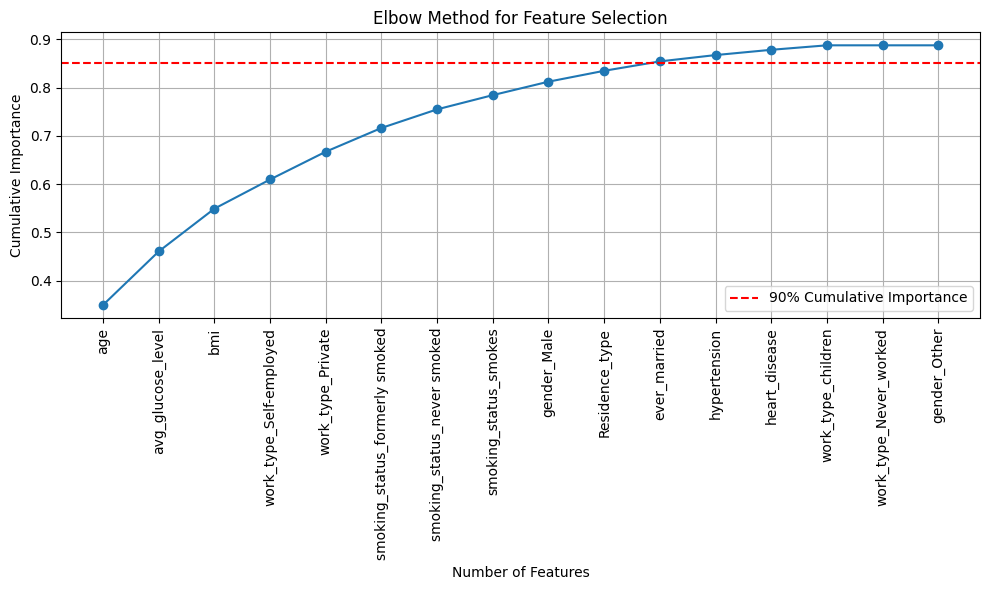

In [ ]:
# Sort the feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Calculate cumulative importance
feature_importance_df['Cumulative Importance'] = feature_importance_df['Importance'].cumsum()

# Plotting cumulative importance against the number of features
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(feature_importance_df) + 1), feature_importance_df['Cumulative Importance'], marker='o')
plt.title('Elbow Method for Feature Selection')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.xticks(range(1, len(feature_importance_df) + 1), feature_importance_df['Feature'], rotation=90)
plt.grid()
plt.axhline(y=0.85, color='r', linestyle='--', label='90% Cumulative Importance')  # Optional: mark a threshold
plt.legend()
plt.tight_layout()
plt.show()

Cumulative Importance Calculation: The cumulative importance for each feature is calculated to see how much total importance is captured as more features are included.

In [ ]:
# Set a cumulative importance threshold (e.g., 90%)
#cumulative_threshold = 0.9
#selected_features_cumulative = feature_importance_df[feature_importance_df['Cumulative Importance'] <= cumulative_threshold]

# Set a threshold
threshold = 0.02
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]

print("\nSelected features based on cumulative importance threshold:")
print(selected_features)


Selected features based on cumulative importance threshold:
                           Feature  Importance  Cumulative Importance
1                              age    0.349578               0.349578
6                avg_glucose_level    0.110924               0.460502
7                              bmi    0.088580               0.549082
12         work_type_Self-employed    0.060440               0.609522
11               work_type_Private    0.057565               0.667088
14  smoking_status_formerly smoked    0.049159               0.716247
15     smoking_status_never smoked    0.038552               0.754799
16           smoking_status_smokes    0.029465               0.784264
8                      gender_Male    0.027855               0.812119
5                   Residence_type    0.022546               0.834665


In [ ]:
# Step 5: Train the model using only the selected important features

# Convert selected_features DataFrame to a list
selected_feature_names = selected_features['Feature'].tolist()

X_train_selected = X_train_balanced[selected_feature_names]
X_test_selected = X_test[selected_feature_names]


In [ ]:
#Checking for missing values
y_train_balanced.isnull().sum()
#BMI is missing for 201 records.

0

In [ ]:
X_test_selected

,age,avg_glucose_level,bmi,work_type_Self-employed,work_type_Private,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Male,Residence_type
3725,63.0,78.23,34.8,False,True,False,True,False,True,0
4481,43.0,86.67,33.3,False,True,False,True,False,False,1
1545,23.0,126.67,28.7,False,True,False,False,True,False,1
1820,21.0,208.17,24.9,False,True,False,True,False,False,1
1262,67.0,113.34,26.3,False,True,True,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...
1042,82.0,82.21,26.0,True,False,False,True,False,False,1
1171,34.0,120.06,33.0,False,False,False,True,False,False,0
3199,50.0,92.15,20.8,False,False,False,True,False,False,1
3208,15.0,62.57,32.3,False,False,False,True,False,True,0


Confusion Matrix:
[[799 173]
 [ 21  29]]

Accuracy: 0.8101761252446184

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.82      0.89       972
           1       0.14      0.58      0.23        50

    accuracy                           0.81      1022
   macro avg       0.56      0.70      0.56      1022
weighted avg       0.93      0.81      0.86      1022



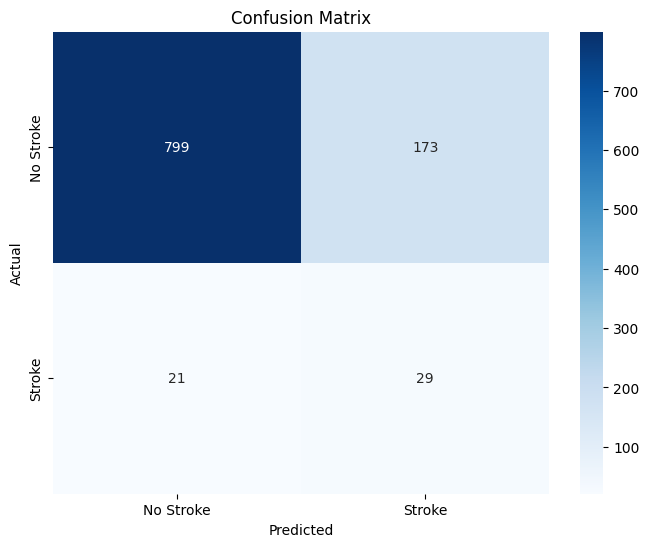

In [ ]:
# Create a logistic regression model
model = LogisticRegression(max_iter=200, solver='liblinear')

# Fit the model to the training data
model.fit(X_train_selected, y_train_balanced)

# Make predictions on the test set
# Step 6: Evaluate the model
y_pred = model.predict(X_test_selected)


# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", class_report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Confusion Matrix:
[[801 171]
 [ 20  30]]

Accuracy: 0.8131115459882583

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89       972
           1       0.15      0.60      0.24        50

    accuracy                           0.81      1022
   macro avg       0.56      0.71      0.57      1022
weighted avg       0.94      0.81      0.86      1022



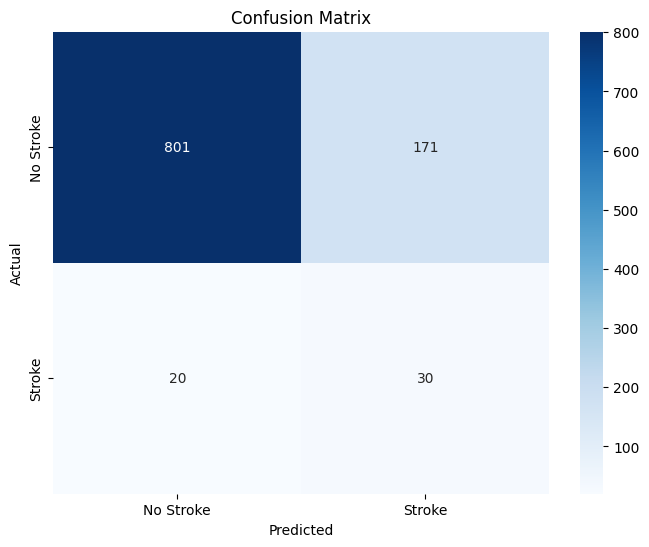

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Step 2: Set up the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Step 3: Create the logistic regression model
logistic_model = LogisticRegression()

# Step 4: Create the GridSearchCV object
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Step 5: Fit the grid search to the training data
grid_search.fit(X_train_selected, y_train_balanced)


# Step 6: Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters: {best_params}")

# Step 7: Predict using the best model
y_pred = best_model.predict(X_test_selected)

# Step 8: Evaluate the model
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", class_report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

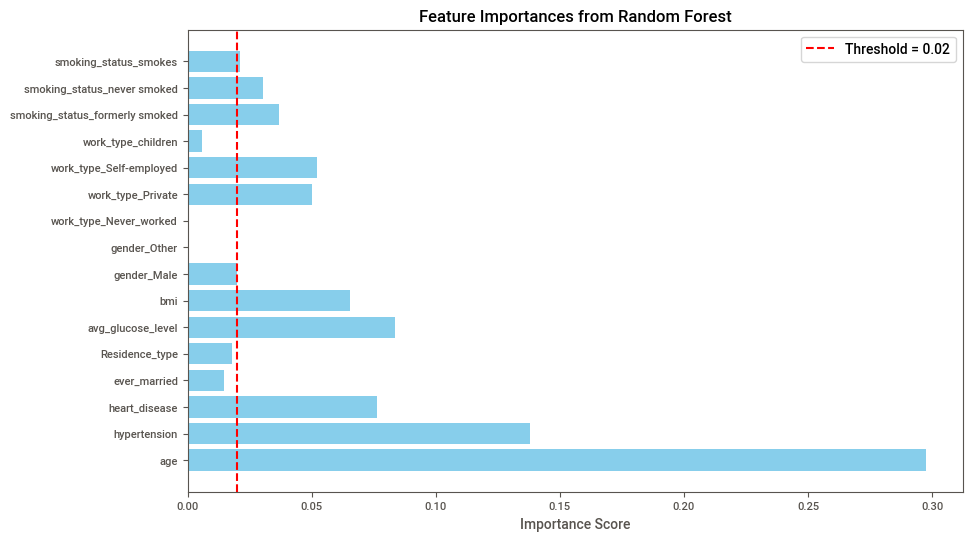

In [ ]:
# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importances from Random Forest')
plt.axvline(x=0.02, color='red', linestyle='--', label='Threshold = 0.02')  # Example threshold
plt.legend()
plt.show()

In [ ]:
print(pd.Series(y_train_balanced).value_counts())


stroke
0    3889
1    3889
Name: count, dtype: int64


Confusion Matrix:
[[884  88]
 [ 39  11]]

Accuracy: 0.87573385518591

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       972
           1       0.11      0.22      0.15        50

    accuracy                           0.88      1022
   macro avg       0.53      0.56      0.54      1022
weighted avg       0.92      0.88      0.89      1022



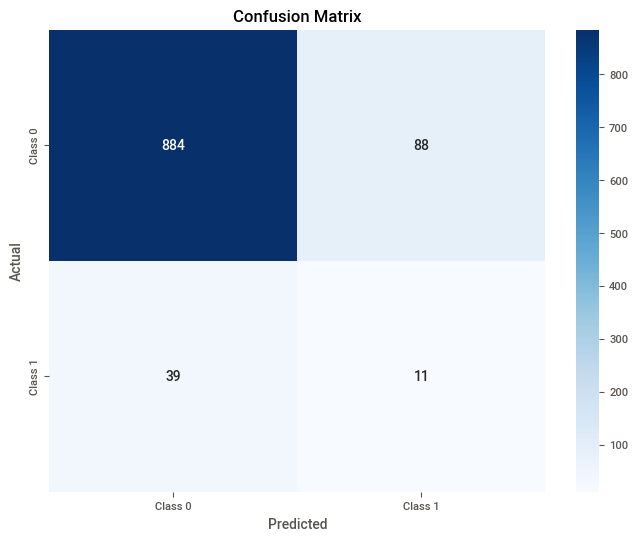

In [ ]:
from sklearn.tree import plot_tree
# Initialize the Decision Tree Classifier
model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train_selected, y_train_balanced)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", class_report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
y_pred_probs = model.predict_proba(X_test_selected)[:, 1]  # Get probabilities for the positive class
print(y_pred_probs)


[0.45 0.02 0.   ... 0.06 0.05 0.18]


Apply Cost complexicity pruning technique to improve the model performance:



In [ ]:
# Create an initial decision tree
dt = DecisionTreeClassifier(random_state=42)

# Fit the model to get the cost complexity pruning path
dt.fit(X_train_selected, y_train_balanced)
path = dt.cost_complexity_pruning_path(X_train_selected, y_train_balanced)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Display the alphas and impurities
print("CCP Alphas:", ccp_alphas)
print("Impurities:", impurities)


CCP Alphas: [0.00000000e+00 6.34803291e-05 8.12006875e-05 8.44513686e-05
 9.64258164e-05 9.64258164e-05 1.02407982e-04 1.02854204e-04
 1.02854204e-04 1.07139796e-04 1.07139796e-04 1.07139796e-04
 1.07139796e-04 1.07139796e-04 1.07139796e-04 1.10200933e-04
 1.10200933e-04 1.10200933e-04 1.10200933e-04 1.10200933e-04
 1.10200933e-04 1.14282449e-04 1.14282449e-04 1.14282449e-04
 1.14282449e-04 1.14282449e-04 1.15710980e-04 1.15710980e-04
 1.16323207e-04 1.16879777e-04 1.16879777e-04 1.17853776e-04
 1.18677928e-04 1.18677928e-04 1.19384344e-04 1.19384344e-04
 1.19384344e-04 1.19996572e-04 1.19996572e-04 1.19996572e-04
 1.19996572e-04 1.20532271e-04 1.20532271e-04 1.20532271e-04
 1.21004946e-04 1.21004946e-04 1.21004946e-04 1.21425102e-04
 1.21425102e-04 1.21425102e-04 1.21618147e-04 1.21801031e-04
 1.22139367e-04 1.22139367e-04 1.22445481e-04 1.22977853e-04
 1.22977853e-04 1.23073407e-04 1.23210765e-04 1.23210765e-04
 1.23425045e-04 1.24134384e-04 1.24134384e-04 1.24420408e-04
 1.24420408e

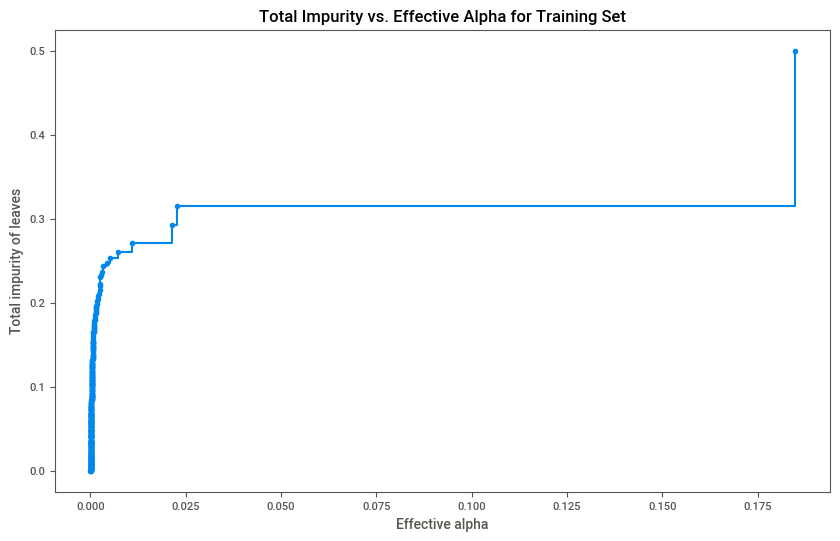

In [ ]:
# Plot the impurity vs. alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle='steps-post')
plt.xlabel('Effective alpha')
plt.ylabel('Total impurity of leaves')
plt.title('Total Impurity vs. Effective Alpha for Training Set')
plt.show()

In [ ]:
# List to store the models and their accuracies
models = []
accuracies = []

for alpha in ccp_alphas:
    # Create a Decision Tree with the given alpha for pruning
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha,class_weight='balanced')
    model.fit(X_train_selected, y_train_balanced)

    # Evaluate the model
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    models.append(model)
    accuracies.append(accuracy)

# Find the best alpha
best_alpha = ccp_alphas[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print(f"Best alpha: {best_alpha}")
print(f"Best accuracy: {best_accuracy:.2f}")

Best alpha: 0.1848156588062122
Best accuracy: 0.95


In [ ]:
# Using the best alpha to create a new model
best_model = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha,class_weight='balanced')
best_model.fit(X_train_selected, y_train_balanced)

# Make predictions with the best model
y_pred_best = best_model.predict(X_test_selected)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print(f'Accuracy: {accuracy_score(y_test, y_pred_best):.2f}')

Confusion Matrix:
 [[972   0]
 [ 50   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

Accuracy: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Step 5: Train the XGBoost model
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_selected, y_train_balanced)

# Step 6: Make predictions on the test set
y_pred = xgb_model.predict(X_test_selected)
y_pred_probs = xgb_model.predict_proba(X_test_selected)[:, 1]  # Probabilities for positive class

# Step 7: Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:hypertension: category, heart_disease: category, gender_Male: object, gender_Other: object, work_type_Never_worked: object, work_type_Private: object, work_type_Self-employed: object, work_type_children: object, smoking_status_formerly smoked: object, smoking_status_never smoked: object, smoking_status_smokes: object

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Create an instance of the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(xgb_model, X_train_selected, y_train_balanced, cv=5, scoring='accuracy')

# Print the cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:48:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:48:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:48:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:48:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:48:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-validation scores: [0.86568123 0.95758355 0.94922879 0.9607717  0.96141479]
Mean accuracy: 0.94 ± 0.04


In [ ]:
# Fit the model on the entire training set
xgb_model.fit(X_train_selected, y_train_balanced)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_selected)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:48:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
 [[913  59]
 [ 40  10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.14      0.20      0.17        50

    accuracy                           0.90      1022
   macro avg       0.55      0.57      0.56      1022
weighted avg       0.92      0.90      0.91      1022

Accuracy: 0.90
